# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

# show all observation-related columns/rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
azdias.shape

(891221, 85)

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head(20).T
#azdias.sample(10).T

0     1     2     3     4     5     6     7     8   \
AGER_TYP                -1    -1    -1     2    -1     3    -1    -1    -1   
ALTERSKATEGORIE_GROB     2     1     3     4     3     1     2     1     3   
ANREDE_KZ                1     2     2     2     1     2     2     1     1   
CJT_GESAMTTYP            2     5     3     2     5     2     5     3     3   
FINANZ_MINIMALIST        3     1     1     4     4     3     1     3     4   
FINANZ_SPARER            4     5     4     2     3     1     5     3     4   
FINANZ_VORSORGER         3     2     1     5     4     5     1     4     2   
FINANZ_ANLEGER           5     5     2     2     1     2     5     1     4   
FINANZ_UNAUFFAELLIGER    5     4     3     1     3     2     4     3     2   
FINANZ_HAUSBAUER         3     5     5     2     2     5     3     2     2   
FINANZTYP                4     1     1     6     5     2     4     5     6   
GEBURTSJAHR              0  1996  1979  1957  1963  1943     0  1964  1974   
GFK_URLAUBERTYP         10    10    10     1     5     1    12     9     3   
GREEN_AVANTGARDE         0     0     1     0     0     0     0     0     1   
HEALTH_TYP              -1     3     3     2     3     3     2     1     3   
LP_LEBENSPHASE_FEIN     15    21     3     0    32     8     2     5    10   
LP_LEBENSPHASE_GROB      4     6     1     0    10     2     1     2     3   
LP_FAMILIE_FEIN          2     5     1     0    10     1     1     1     1   
LP_FAMILIE_GROB          2     3     1     0     5     1     1     1     1   
LP_STATUS_FEIN           1     2     3     9     3     4     2     1    10   
LP_STATUS_GROB           1     1     2     4     2     2     1     1     5   
NATIONALITAET_KZ         0     1     1     1     1     1     1     1     1   
PRAEGENDE_JUGENDJAHRE    0    14    15     8     8     3    10     8    11   
RETOURTYP_BK_S           5     1     3     2     5     3     4     5     4   
SEMIO_SOZ                2     5     4     5     6     2     2     7     4   
SEMIO_FAM                6     4     1     1     4     4     5     7     5   
SEMIO_REL                7     4     3     2     4     7     5     7     4   
SEMIO_MAT                5     3     3     1     2     4     7     5     1   
SEMIO_VERT               1     1     4     4     7     2     2     6     5   
SEMIO_LUST               5     2     4     4     4     2     6     2     6   
SEMIO_ERL                3     2     6     7     4     2     5     2     4   
SEMIO_KULT               3     3     3     4     6     5     5     7     5   
SEMIO_RAT                4     6     4     3     2     7     7     5     2   
SEMIO_KRIT               7     4     7     4     3     4     7     1     5   
SEMIO_DOM                6     7     7     4     2     4     4     1     5   
SEMIO_KAEM               6     4     7     5     2     4     7     2     3   
SEMIO_PFLICHT            5     7     3     4     4     7     7     5     1   
SEMIO_TRADV              3     6     3     4     2     6     7     5     4   
SHOPPER_TYP             -1     3     2     1     2     0     1     0     3   
SOHO_KZ                NaN     1     0     0     0     0     0     0     0   
TITEL_KZ               NaN     0     0     0     0     0     0     0     0   
VERS_TYP                -1     2     1     1     2     2     1     1     2   
ZABEOTYP                 3     5     5     3     4     4     4     1     6   
ALTER_HH               NaN     0    17    13    20    10     0    14    16   
ANZ_PERSONEN           NaN     2     1     0     4     1     1     1     1   
ANZ_TITEL              NaN     0     0     0     0     0     0     0     0   
HH_EINKOMMEN_SCORE       2     6     4     1     5     5     6     4     3   
KK_KUNDENTYP           NaN   NaN   NaN   NaN     1     3   NaN   NaN   NaN   
W_KEIT_KIND_HH         NaN     3     3   NaN     2     6     3     5     5   
WOHNDAUER_2008         NaN     9     9     9     9     9     9     9     8   
ANZ_HAUSHALTE_AKTIV    NaN    11    10     1  

In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
azdias.describe().T

count         mean         std     min     25%  \
AGER_TYP               891221.0    -0.358435    1.198724    -1.0    -1.0   
ALTERSKATEGORIE_GROB   891221.0     2.777398    1.068775     1.0     2.0   
ANREDE_KZ              891221.0     1.522098    0.499512     1.0     1.0   
CJT_GESAMTTYP          886367.0     3.632838    1.595021     1.0     2.0   
FINANZ_MINIMALIST      891221.0     3.074528    1.321055     1.0     2.0   
FINANZ_SPARER          891221.0     2.821039    1.464749     1.0     1.0   
FINANZ_VORSORGER       891221.0     3.401106    1.322134     1.0     3.0   
FINANZ_ANLEGER         891221.0     3.033328    1.529603     1.0     2.0   
FINANZ_UNAUFFAELLIGER  891221.0     2.874167    1.486731     1.0     2.0   
FINANZ_HAUSBAUER       891221.0     3.075121    1.353248     1.0     2.0   
FINANZTYP              891221.0     3.790586    1.987876     1.0     2.0   
GEBURTSJAHR            891221.0  1101.178533  976.583551     0.0     0.0   
GFK_URLAUBERTYP        886367.0     7.350304    3.525723     1.0     5.0   
GREEN_AVANTGARDE       891221.0     0.196612    0.397437     0.0     0.0   
HEALTH_TYP             891221.0     1.792102    1.269062    -1.0     1.0   
LP_LEBENSPHASE_FEIN    886367.0    14.622637   12.616883     0.0     4.0   
LP_LEBENSPHASE_GROB    886367.0     4.453621    3.855639     0.0     1.0   
LP_FAMILIE_FEIN        886367.0     3.599574    3.926486     0.0     1.0   
LP_FAMILIE_GROB        886367.0     2.185966    1.756537     0.0     1.0   
LP_STATUS_FEIN         886367.0     4.791151    3.425305     1.0     2.0   
LP_STATUS_GROB         886367.0     2.432575    1.474315     1.0     1.0   
NATIONALITAET_KZ       891221.0     1.026827    0.586634     0.0     1.0   
PRAEGENDE_JUGENDJAHRE  891221.0     8.154346    4.844532     0.0     5.0   
RETOURTYP_BK_S         886367.0     3.419630    1.417741     1.0     2.0   
SEMIO_SOZ              891221.0     3.945860    1.946564     1.0     2.0   
SEMIO_FAM              891221.0     4.272729    1.915885     1.0     3.0   
SEMIO_REL              891221.0     4.240609    2.007373     1.0     3.0   
SEMIO_MAT              891221.0     4.001597    1.857540     1.0     2.0   
SEMIO_VERT             891221.0     4.023709    2.077746     1.0     2.0   
SEMIO_LUST             891221.0     4.359086    2.022829     1.0     2.0   
SEMIO_ERL              891221.0     4.481405    1.807552     1.0     3.0   
SEMIO_KULT             891221.0     4.025014    1.903816     1.0     3.0   
SEMIO_RAT              891221.0     3.910139    1.580306     1.0     3.0   
SEMIO_KRIT             891221.0     4.763223    1.830789     1.0     3.0   
SEMIO_DOM              891221.0     4.667550    1.795712     1.0     3.0   
SEMIO_KAEM             891221.0     4.445007    1.852412     1.0     3.0   
SEMIO_PFLICHT          891221.0     4.256076    1.770137     1.0     3.0   
SEMIO_TRADV            891221.0     3.661784    1.707637     1.0     2.0   
SHOPPER_TYP            891221.0     1.266967    1.287435    -1.0     0.0   
SOHO_KZ                817722.0     0.008423    0.091392     0.0     0.0   
TITEL_KZ               817722.0     0.003483    0.084957     0.0     0.0   
VERS_TYP               891221.0     1.197852    0.952532    -1.0     1.0   
ZABEOTYP               891221.0     3.362438    1.352704     1.0     3.0   
ALTER_HH               817722.0    10.864126    7.639683     0.0     0.0   
ANZ_PERSONEN           817722.0     1.727637    1.155849     0.0     1.0   
ANZ_TITEL              817722.0     0.004162    0.068855     0.0     0.0   
HH_EINKOMMEN_SCORE     872873.0     4.207243    1.624057     1.0     3.0   
KK_KUNDENTYP           306609.0     3.410640    1.628844     1.0     2.0   
W_KEIT_KIND_HH         783619.0     3.933406    1.964701     0.0     2.0   
WOHNDAUER_2008         817722.0     7.908791    1.923137     1.0     8.0   
ANZ_HAUSHALTE_AKTIV    798073.0     8.287263   15.628087     0.0     1.0   
ANZ_HH_TITEL           794213.0     0.040647    0.324028     0.0     0.0  

In [7]:
feat_info.shape

(85, 4)

In [8]:
feat_info

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
30              SEMIO_ERL            person      ordinal             [-1,9]
31             SEMIO_KULT            person      ordinal             [-1,9]
32              SEMIO_RAT            person      ordinal             [-1,9]
33             SEMIO_KRIT            person      ordinal             [-1,9]
34              SEMIO_DOM            person      ordinal             [-1,9]
35             SEMIO_KAEM            person      ordinal             [-1,9]
36          SEMIO_PFLICHT            person      ordinal             [-1,9]
37            SEMIO_TRADV            person      ordinal             [-1,9]
38            SHOPPER_TYP            person  categorical               [-1]
39                SOHO_KZ            person  categorical               [-1]
40               TITEL_KZ            person  categorical             [-1,0]
41               VERS_TYP            person  categorical               [-1]
42               ZABEOTYP            person  categorical             [-1,9]
43               ALTER_HH         household     interval                [0]
44           ANZ_PERSONEN         household      numeric                 []
45              ANZ_TITEL         household      numeric                 []
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]
47           KK_KUNDENTYP         household  categorical               [-1]
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]
49         WOHNDAUER_2008         household      ordinal             [-1,0]
50    ANZ_HAUSHALTE_AKTIV          building      numeric                [0]
51           ANZ_HH_TITEL          building      numeric        

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [9]:
# Identify missing or unknown data values and convert them to NaNs.

def replace_missing_values_with_nan(df, mapper, mapper_column_name, mapper_column_definition, non_numerical_indicators=[]):
    # For each mapper_df row definition
    for index, row in mapper.iterrows():
        # Omit rows with no NaNs or with lists without values
        if len(row[mapper_column_definition]) > 0 and row[mapper_column_definition] != ['']:
            try:
                # For each column definition
                # build a list of nan_indicators
                replace_mask = []
                for nan_indicator in row[mapper_column_definition]:
                    
                    if nan_indicator in non_numerical_indicators:
                        replace_mask.append(nan_indicator)
                    else:
                        replace_mask.append(int(nan_indicator))
                
                #print(replace_mask)
                # Replace masked values with NaN
                df[row[mapper_column_name]] = df[row[mapper_column_name]].replace(replace_mask, np.nan)
                
            except Exception as e:
                print('Exception: {} -> {} --> {}'.format(row[mapper_column_name], str(e), nan_indicator))
                continue
                
    return df

In [10]:
# Remove brackets and split strings into lists
# in feat_info.missing_or_unknown
#type(feat_info.missing_or_unknown[0]) # -> str
feat_info.missing_or_unknown = feat_info.missing_or_unknown.str.strip('[').str.strip(']').str.split(',')

In [11]:
#if type(feat_info.missing_or_unknown[0]) == list:
#    print('a')
type(feat_info.missing_or_unknown[0])

list

In [12]:
feat_info.head(20)

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical            [-1, 0]
1    ALTERSKATEGORIE_GROB            person      ordinal         [-1, 0, 9]
2               ANREDE_KZ            person  categorical            [-1, 0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal            [-1, 0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]

In [13]:
# Replace with NaNs all values in all columns of azdias as per mapping in feat_info
azdias = replace_missing_values_with_nan(azdias, feat_info, 'attribute', 'missing_or_unknown', non_numerical_indicators=['X', 'XX'])

In [14]:
azdias.head(20).T

0     1     2     3     4     5     6     7     8   \
AGER_TYP               NaN   NaN   NaN     2   NaN     3   NaN   NaN   NaN   
ALTERSKATEGORIE_GROB     2     1     3     4     3     1     2     1     3   
ANREDE_KZ                1     2     2     2     1     2     2     1     1   
CJT_GESAMTTYP            2     5     3     2     5     2     5     3     3   
FINANZ_MINIMALIST        3     1     1     4     4     3     1     3     4   
FINANZ_SPARER            4     5     4     2     3     1     5     3     4   
FINANZ_VORSORGER         3     2     1     5     4     5     1     4     2   
FINANZ_ANLEGER           5     5     2     2     1     2     5     1     4   
FINANZ_UNAUFFAELLIGER    5     4     3     1     3     2     4     3     2   
FINANZ_HAUSBAUER         3     5     5     2     2     5     3     2     2   
FINANZTYP                4     1     1     6     5     2     4     5     6   
GEBURTSJAHR            NaN  1996  1979  1957  1963  1943   NaN  1964  1974   
GFK_URLAUBERTYP         10    10    10     1     5     1    12     9     3   
GREEN_AVANTGARDE         0     0     1     0     0     0     0     0     1   
HEALTH_TYP             NaN     3     3     2     3     3     2     1     3   
LP_LEBENSPHASE_FEIN     15    21     3   NaN    32     8     2     5    10   
LP_LEBENSPHASE_GROB      4     6     1   NaN    10     2     1     2     3   
LP_FAMILIE_FEIN          2     5     1   NaN    10     1     1     1     1   
LP_FAMILIE_GROB          2     3     1   NaN     5     1     1     1     1   
LP_STATUS_FEIN           1     2     3     9     3     4     2     1    10   
LP_STATUS_GROB           1     1     2     4     2     2     1     1     5   
NATIONALITAET_KZ       NaN     1     1     1     1     1     1     1     1   
PRAEGENDE_JUGENDJAHRE  NaN    14    15     8     8     3    10     8    11   
RETOURTYP_BK_S           5     1     3     2     5     3     4     5     4   
SEMIO_SOZ                2     5     4     5     6     2     2     7     4   
SEMIO_FAM                6     4     1     1     4     4     5     7     5   
SEMIO_REL                7     4     3     2     4     7     5     7     4   
SEMIO_MAT                5     3     3     1     2     4     7     5     1   
SEMIO_VERT               1     1     4     4     7     2     2     6     5   
SEMIO_LUST               5     2     4     4     4     2     6     2     6   
SEMIO_ERL                3     2     6     7     4     2     5     2     4   
SEMIO_KULT               3     3     3     4     6     5     5     7     5   
SEMIO_RAT                4     6     4     3     2     7     7     5     2   
SEMIO_KRIT               7     4     7     4     3     4     7     1     5   
SEMIO_DOM                6     7     7     4     2     4     4     1     5   
SEMIO_KAEM               6     4     7     5     2     4     7     2     3   
SEMIO_PFLICHT            5     7     3     4     4     7     7     5     1   
SEMIO_TRADV              3     6     3     4     2     6     7     5     4   
SHOPPER_TYP            NaN     3     2     1     2     0     1     0     3   
SOHO_KZ                NaN     1     0     0     0     0     0     0     0   
TITEL_KZ               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
VERS_TYP               NaN     2     1     1     2     2     1     1     2   
ZABEOTYP                 3     5     5     3     4     4     4     1     6   
ALTER_HH               NaN   NaN    17    13    20    10   NaN    14    16   
ANZ_PERSONEN           NaN     2     1     0     4     1     1     1     1   
ANZ_TITEL              NaN     0     0     0     0     0     0     0     0   
HH_EINKOMMEN_SCORE       2     6     4     1     5     5     6     4     3   
KK_KUNDENTYP           NaN   NaN   NaN   NaN     1     3   NaN   NaN   NaN   
W_KEIT_KIND_HH         NaN     3     3   NaN     2     6     3     5     5   
WOHNDAUER_2008         NaN     9     9     9     9     9     9     9     8   
ANZ_HAUSHALTE_AKTIV    NaN    11    10     1  

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [15]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

def extract_columns_with_nan(df):

    # Extract columns with NaNs
    columns_with_nans = df.isnull().sum()[df.isnull().sum() > 0]

    # Calculate percentage of NaN for each column
    dic_nan = {'sum': columns_with_nans.values, 'percent': np.round(columns_with_nans.values * 100 / df.shape[0], 2)}

    # Build a dataframe including only columns with NaNs
    df_nan = pd.DataFrame(data=dic_nan, index=columns_with_nans.index)

    # Sort by percentage
    df_nan.sort_values(by='percent', ascending=False, inplace=True)

    return df_nan

In [16]:
azdias_nan = extract_columns_with_nan(azdias)
azdias_nan

sum  percent
TITEL_KZ               889061    99.76
AGER_TYP               685843    76.96
KK_KUNDENTYP           584612    65.60
KBA05_BAUMAX           476524    53.47
GEBURTSJAHR            392318    44.02
ALTER_HH               310267    34.81
KKK                    158064    17.74
REGIOTYP               158064    17.74
W_KEIT_KIND_HH         147988    16.61
KBA05_ANTG3            133324    14.96
KBA05_ANTG1            133324    14.96
KBA05_ANTG2            133324    14.96
KBA05_GBZ              133324    14.96
KBA05_ANTG4            133324    14.96
MOBI_REGIO             133324    14.96
PLZ8_ANTG2             116515    13.07
PLZ8_ANTG1             116515    13.07
PLZ8_ANTG3             116515    13.07
PLZ8_ANTG4             116515    13.07
PLZ8_BAUMAX            116515    13.07
PLZ8_HHZ               116515    13.07
PLZ8_GBZ               116515    13.07
VERS_TYP               111196    12.48
SHOPPER_TYP            111196    12.48
HEALTH_TYP             111196    12.48
NATIONALITAET_KZ       108315    12.15
PRAEGENDE_JUGENDJAHRE  108164    12.14
KBA13_ANZAHL_PKW       105800    11.87
ANZ_HAUSHALTE_AKTIV     99611    11.18
CAMEO_INTL_2015         99352    11.15
CAMEO_DEUG_2015         99352    11.15
CAMEO_DEU_2015          99352    11.15
LP_LEBENSPHASE_FEIN     97632    10.95
ARBEIT                  97375    10.93
RELAT_AB                97375    10.93
ORTSGR_KLS9             97274    10.91
ANZ_HH_TITEL            97008    10.88
LP_LEBENSPHASE_GROB     94572    10.61
INNENSTADT              93740    10.52
BALLRAUM                93740    10.52
EWDICHTE                93740    10.52
WOHNLAGE                93148    10.45
OST_WEST_KZ             93148    10.45
GEBAEUDETYP_RASTER      93155    10.45
MIN_GEBAEUDEJAHR        93148    10.45
GEBAEUDETYP             93148    10.45
LP_FAMILIE_GROB         77792     8.73
LP_FAMILIE_FEIN         77792     8.73
KONSUMNAEHE             73969     8.30
WOHNDAUER_2008          73499     8.25
ANZ_TITEL               73499     8.25
ANZ_PERSONEN            73499     8.25
SOHO_KZ                 73499     8.25
HH_EINKOMMEN_SCORE      18348     2.06
RETOURTYP_BK_S           4854     0.54
LP_STATUS_GROB           4854     0.54
LP_STATUS_FEIN           4854     0.54
GFK_URLAUBERTYP          4854     0.54
CJT_GESAMTTYP            4854     0.54
ONLINE_AFFINITAET        4854     0.54
ALTERSKATEGORIE_GROB     2881     0.32

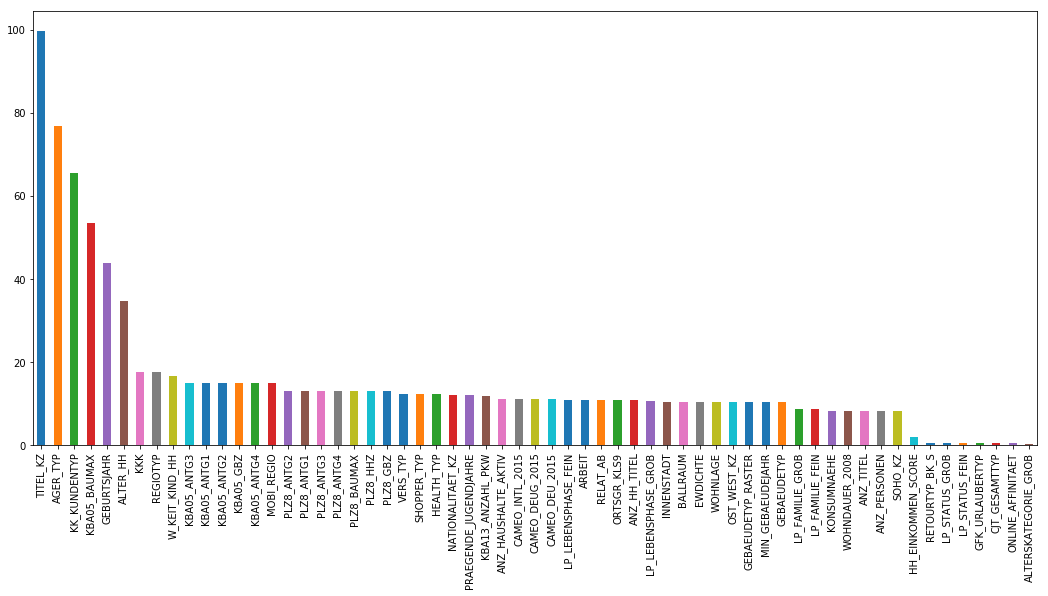

In [17]:
# Investigate patterns in the amount of missing data in each column.
azdias_nan.percent.plot.bar(figsize=(18, 8));

In [18]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Drop the outlier columns
columns_to_drop = azdias_nan[azdias_nan.percent > 30.].index.tolist()
#columns_to_drop
azdias.drop(columns_to_drop, axis=1, inplace=True)
#azdias_copy.head(20).T

In [19]:
# Drop the corresponding columns from feat_info
feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]
#feat_info

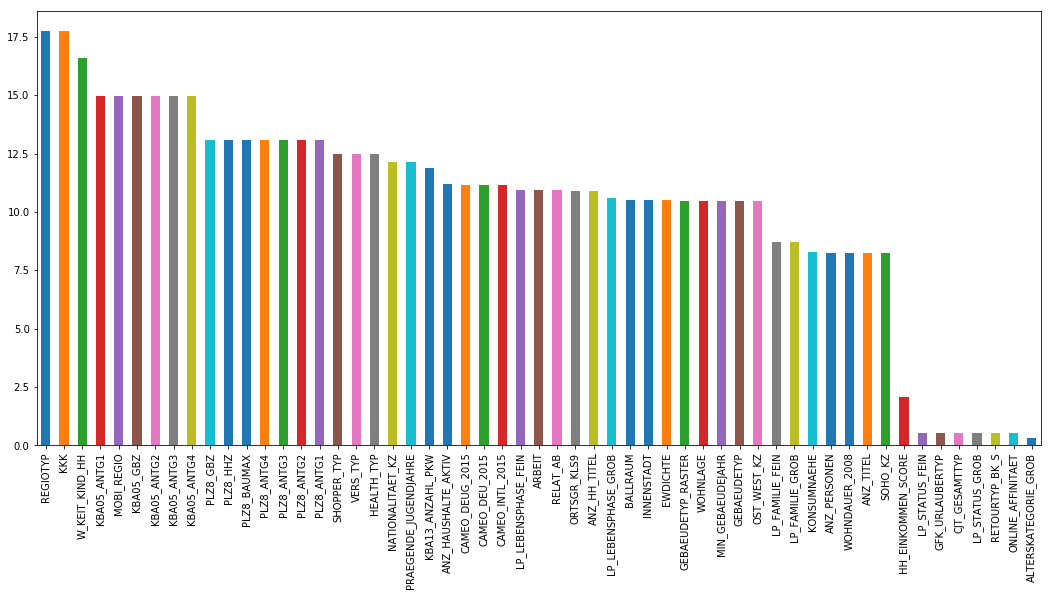

In [20]:
# Investigate patterns in the amount of missing data in remaining columns
azdias_nan = extract_columns_with_nan(azdias)
azdias_nan.percent.plot.bar(figsize=(18, 8));

In [21]:
azdias_nan.head(5)

sum  percent
REGIOTYP        158064    17.74
KKK             158064    17.74
W_KEIT_KIND_HH  147988    16.61
KBA05_ANTG1     133324    14.96
MOBI_REGIO      133324    14.96

In [22]:
# In order to merge to dataframes by index we need to have indexes
# as attributes in both dataframes
feat_info.set_index('attribute', inplace=True, drop=False)
feat_info.head(5)

attribute information_level         type  \
attribute                                                                   
ALTERSKATEGORIE_GROB  ALTERSKATEGORIE_GROB            person      ordinal   
ANREDE_KZ                        ANREDE_KZ            person  categorical   
CJT_GESAMTTYP                CJT_GESAMTTYP            person  categorical   
FINANZ_MINIMALIST        FINANZ_MINIMALIST            person      ordinal   
FINANZ_SPARER                FINANZ_SPARER            person      ordinal   

                     missing_or_unknown  
attribute                                
ALTERSKATEGORIE_GROB         [-1, 0, 9]  
ANREDE_KZ                       [-1, 0]  
CJT_GESAMTTYP                       [0]  
FINANZ_MINIMALIST                  [-1]  
FINANZ_SPARER                      [-1]

In [23]:
# Add NaN information columns to feat_info
# by index / rows, for better columns understanding
feat_info = feat_info.join(azdias_nan)

# Sort by percentage
feat_info.sort_values(by='percent', ascending=False, inplace=True)

In [24]:
# Let's inspect columns with the missing data ratio greater than 11%
feat_info[feat_info.percent >= 11]

attribute information_level         type  \
attribute                                                                     
REGIOTYP                            REGIOTYP        region_rr1      ordinal   
KKK                                      KKK        region_rr1      ordinal   
W_KEIT_KIND_HH                W_KEIT_KIND_HH         household      ordinal   
KBA05_ANTG1                      KBA05_ANTG1     microcell_rr3      ordinal   
MOBI_REGIO                        MOBI_REGIO        region_rr1      ordinal   
KBA05_GBZ                          KBA05_GBZ     microcell_rr3      ordinal   
KBA05_ANTG2                      KBA05_ANTG2     microcell_rr3      ordinal   
KBA05_ANTG3                      KBA05_ANTG3     microcell_rr3      ordinal   
KBA05_ANTG4                      KBA05_ANTG4     microcell_rr3      ordinal   
PLZ8_GBZ                            PLZ8_GBZ    macrocell_plz8      ordinal   
PLZ8_HHZ                            PLZ8_HHZ    macrocell_plz8      ordinal   
PLZ8_BAUMAX                      PLZ8_BAUMAX    macrocell_plz8        mixed   
PLZ8_ANTG4                        PLZ8_ANTG4    macrocell_plz8      ordinal   
PLZ8_ANTG3                        PLZ8_ANTG3    macrocell_plz8      ordinal   
PLZ8_ANTG2                        PLZ8_ANTG2    macrocell_plz8      ordinal   
PLZ8_ANTG1                        PLZ8_ANTG1    macrocell_plz8      ordinal   
SHOPPER_TYP                      SHOPPER_TYP            person  categorical   
VERS_TYP                            VERS_TYP            person  categorical   
HEALTH_TYP                        HEALTH_TYP            person      ordinal   
NATIONALITAET_KZ            NATIONALITAET_KZ            person  categorical   
PRAEGENDE_JUGENDJAHRE  PRAEGENDE_JUGENDJAHRE            person        mixed   
KBA13_ANZAHL_PKW            KBA13_ANZAHL_PKW    macrocell_plz8      numeric   
ANZ_HAUSHALTE_AKTIV      ANZ_HAUSHALTE_AKTIV          building      numeric   
CAMEO_DEUG_2015              CAMEO_DEUG_2015     microcell_rr4  categorical   
CAMEO_DEU_2015                CAMEO_DEU_2015     microcell_rr4  categorical   
CAMEO_INTL_2015              CAMEO_INTL_2015     microcell_rr4        mixed   

                      missing_or_unknown       sum  percent  
attribute                                                    
REGIOTYP                         [-1, 0]  158064.0    17.74  
KKK                              [-1, 0]  158064.0    17.74  
W_KEIT_KIND_HH                   [-1, 0]  147988.0    16.61  
KBA05_ANTG1                         [-1]  133324.0    14.96  
MOBI_REGIO                            []  133324.0    14.96  
KBA05_GBZ                        [-1, 0]  133324.0    14.96  
KBA05_ANTG2                         [-1]  133324.0    14.96  
KBA05_ANTG3                         [-1]  133324.0    14.96  
KBA05_ANTG4                         [-1]  133324.0    14.96  
PLZ8_GBZ                            [-1]  116515.0    13.07  
PLZ8_HHZ                            [-1]  116515.0    13.07  
PLZ8_BAUMAX                      [-1, 0]  116515.0    13.07  
PLZ8_ANTG4                          [-1]  116515.0    13.07  
PLZ8_ANTG3                          [-1]  116515.0    13.07  
PLZ8_ANTG2                          [-1]  116515.0    13.07  
PLZ8_ANTG1                          [-1]  116515.0    13.07  
SHOPPER_TYP                         [-1]  111196.0    12.48  
VERS_TYP                            [-1]  111196.0    12.48  
HEALTH_TYP                       [-1, 0]  111196.0    12.48  
NATIONALITAET_KZ                 [-1, 0]  108315.0    12.15  
PRAEGENDE_JUGENDJAHRE            [-1, 0]  108164.0    12.14  
KBA13_ANZAHL_PKW                      []  105800.0    11.87  
ANZ_HAUSHALTE_AKTIV                  [0]   99611.0    11.18  
CAMEO_DEUG_2015                  [-1, X]   99352.0    11.15  
CAMEO_DEU_2015                      [XX]   99352.0    11.15  
CAMEO_INTL_2015                 [-1, XX]   99352.0    11.15

In [25]:
# Let's inspect columns with the missing data ratio greater than 2% and less than 11%
feat_info.query('percent < 11 & percent >= 2')

attribute information_level         type  \
attribute                                                                 
LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_FEIN            person        mixed   
ARBEIT                            ARBEIT         community      ordinal   
RELAT_AB                        RELAT_AB         community      ordinal   
ORTSGR_KLS9                  ORTSGR_KLS9         community      ordinal   
ANZ_HH_TITEL                ANZ_HH_TITEL          building      numeric   
LP_LEBENSPHASE_GROB  LP_LEBENSPHASE_GROB            person        mixed   
BALLRAUM                        BALLRAUM          postcode      ordinal   
INNENSTADT                    INNENSTADT          postcode      ordinal   
EWDICHTE                        EWDICHTE          postcode      ordinal   
GEBAEUDETYP_RASTER    GEBAEUDETYP_RASTER        region_rr1      ordinal   
WOHNLAGE                        WOHNLAGE          building        mixed   
MIN_GEBAEUDEJAHR        MIN_GEBAEUDEJAHR          building      numeric   
GEBAEUDETYP                  GEBAEUDETYP          building  categorical   
OST_WEST_KZ                  OST_WEST_KZ          building  categorical   
LP_FAMILIE_FEIN          LP_FAMILIE_FEIN            person  categorical   
LP_FAMILIE_GROB          LP_FAMILIE_GROB            person  categorical   
KONSUMNAEHE                  KONSUMNAEHE          building      ordinal   
ANZ_PERSONEN                ANZ_PERSONEN         household      numeric   
WOHNDAUER_2008            WOHNDAUER_2008         household      ordinal   
ANZ_TITEL                      ANZ_TITEL         household      numeric   
SOHO_KZ                          SOHO_KZ            person  categorical   
HH_EINKOMMEN_SCORE    HH_EINKOMMEN_SCORE         household      ordinal   

                    missing_or_unknown      sum  percent  
attribute                                                 
LP_LEBENSPHASE_FEIN                [0]  97632.0    10.95  
ARBEIT                         [-1, 9]  97375.0    10.93  
RELAT_AB                       [-1, 9]  97375.0    10.93  
ORTSGR_KLS9                    [-1, 0]  97274.0    10.91  
ANZ_HH_TITEL                        []  97008.0    10.88  
LP_LEBENSPHASE_GROB                [0]  94572.0    10.61  
BALLRAUM                          [-1]  93740.0    10.52  
INNENSTADT                        [-1]  93740.0    10.52  
EWDICHTE                          [-1]  93740.0    10.52  
GEBAEUDETYP_RASTER                  []  93155.0    10.45  
WOHNLAGE                          [-1]  93148.0    10.45  
MIN_GEBAEUDEJAHR                   [0]  93148.0    10.45  
GEBAEUDETYP                    [-1, 0]  93148.0    10.45  
OST_WEST_KZ                       [-1]  93148.0    10.45  
LP_FAMILIE_FEIN                    [0]  77792.0     8.73  
LP_FAMILIE_GROB                    [0]  77792.0     8.73  
KONSUMNAEHE                         []  73969.0     8.30  
ANZ_PERSONEN                        []  73499.0     8.25  
WOHNDAUER_2008                 [-1, 0]  73499.0     8.25  
ANZ_TITEL                           []  73499.0     8.25  
SOHO_KZ                           [-1]  73499.0     8.25  
HH_EINKOMMEN_SCORE             [-1, 0]  18348.0     2.06

In [26]:
# Let's inspect columns with the missing data ratio less than 2%
feat_info.query('percent < 2')

attribute information_level         type  \
attribute                                                                   
LP_STATUS_FEIN              LP_STATUS_FEIN            person  categorical   
GFK_URLAUBERTYP            GFK_URLAUBERTYP            person  categorical   
CJT_GESAMTTYP                CJT_GESAMTTYP            person  categorical   
LP_STATUS_GROB              LP_STATUS_GROB            person  categorical   
RETOURTYP_BK_S              RETOURTYP_BK_S            person      ordinal   
ONLINE_AFFINITAET        ONLINE_AFFINITAET        region_rr1      ordinal   
ALTERSKATEGORIE_GROB  ALTERSKATEGORIE_GROB            person      ordinal   

                     missing_or_unknown     sum  percent  
attribute                                                 
LP_STATUS_FEIN                      [0]  4854.0     0.54  
GFK_URLAUBERTYP                      []  4854.0     0.54  
CJT_GESAMTTYP                       [0]  4854.0     0.54  
LP_STATUS_GROB                      [0]  4854.0     0.54  
RETOURTYP_BK_S                      [0]  4854.0     0.54  
ONLINE_AFFINITAET                    []  4854.0     0.54  
ALTERSKATEGORIE_GROB         [-1, 0, 9]  2881.0     0.32

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

In [27]:
# Examine numerical features
df_num = azdias.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(891221, 75)

In [28]:
n = len(azdias)
for column in df_num:
    n_unique = len(azdias[column].unique())
    print('feature: {}'.format(column))
    print('unique values: {}'.format(n_unique))
    print('unique values ratio: {}'.format(n_unique / n))
    print('missinge value ratio: {}'.format(azdias[column].isnull().sum() / n))
    print()


feature: ALTERSKATEGORIE_GROB
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0032326437550282143

feature: ANREDE_KZ
unique values: 2
unique values ratio: 2.2441122908908116e-06
missinge value ratio: 0.0

feature: CJT_GESAMTTYP
unique values: 7
unique values ratio: 7.854393018117841e-06
missinge value ratio: 0.005446460529992

feature: FINANZ_MINIMALIST
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0

feature: FINANZ_SPARER
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0

feature: FINANZ_VORSORGER
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0

feature: FINANZ_ANLEGER
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0

feature: FINANZ_UNAUFFAELLIGER
unique values: 5
unique values ratio: 5.610280727227029e-06
missinge value ratio: 0.0

feature: FINANZ_HAUSBAUER
unique values: 5
unique values ratio: 5.61

In [29]:
# Identify correlations between numeric features
def correlated_columns_to_drop(df, min_corr_level=0.95):

    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than min_corr_level
    to_drop = [column for column in upper.columns if any(upper[column] > min_corr_level)]

    return to_drop


In [30]:
columns_to_drop = correlated_columns_to_drop(df_num, 0.95)

In [38]:
columns_to_drop

['LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB']

In [51]:
#azdias.drop(columns_to_drop, axis=1, inplace=True)
#feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [52]:
# How much data is missing in each row of the dataset?

missing_data_by_row = azdias.isnull().sum(axis=1)
missing_data_by_row.describe()

count    891221.000000
mean          5.363758
std          12.750325
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          45.000000
dtype: float64

In [53]:
missing_data_by_row[missing_data_by_row == 45]

643174    45
732775    45
dtype: int64

In [54]:
# What is the ratio of rows without missing data?
count_all_rows = missing_data_by_row.count()
count_rows_no_missing_data = missing_data_by_row[missing_data_by_row == 0].count()
count_rows_with_missing_data = missing_data_by_row[missing_data_by_row != 0].count()
percent_rows_with_missing_data = count_rows_with_missing_data * 100 / count_all_rows
percent_rows_no_missing_data = 100 - percent_rows_with_missing_data

print('{}\t -> Number of all rows (100%).'.format(count_all_rows))
print('{}\t -> Number of rows with missing data ({:0.2f}%).'.format(count_rows_with_missing_data, percent_rows_with_missing_data))
print('{}\t -> Number of rows with no missing data ({:0.2f}%).'.format(count_rows_no_missing_data, percent_rows_no_missing_data))

891221	 -> Number of all rows (100%).
268012	 -> Number of rows with missing data (30.07%).
623209	 -> Number of rows with no missing data (69.93%).


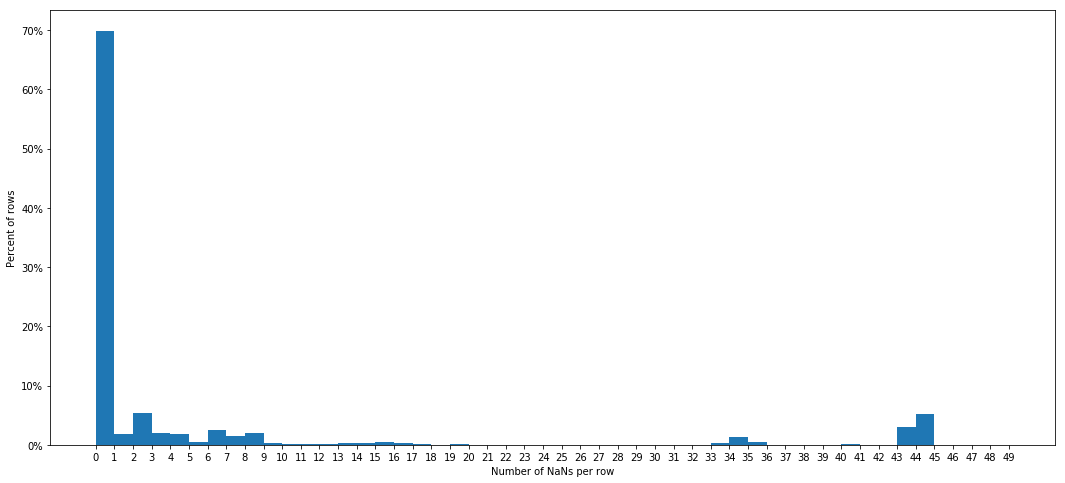

In [55]:
plt.figure(figsize=(18, 8))
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of NaNs per row')
plt.ylabel('Percent of rows')
# Percent of observations in the Y axis
plt.hist(missing_data_by_row, weights=np.ones(len(missing_data_by_row)) / len(missing_data_by_row), bins=np.arange(0, 50, 1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show();

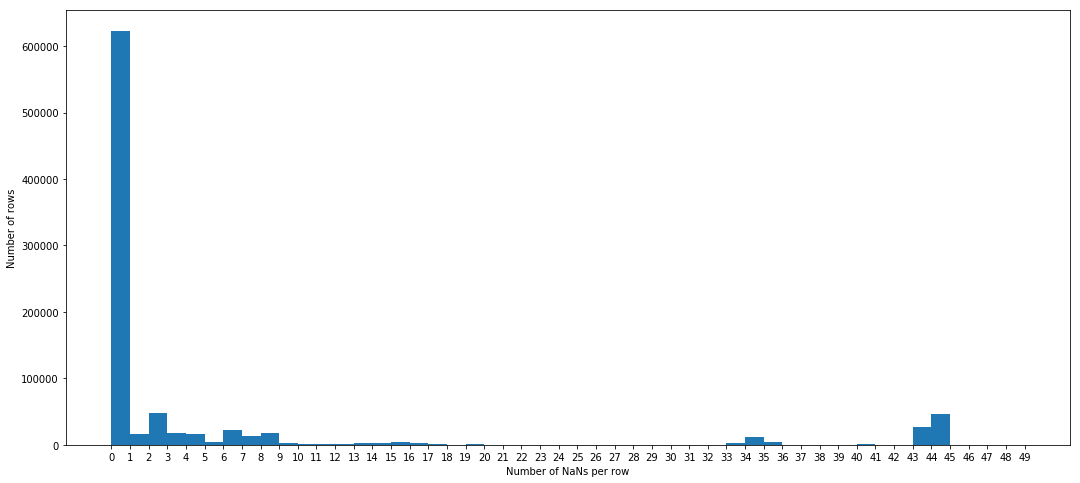

In [56]:
plt.figure(figsize=(18, 8))
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of NaNs per row')
plt.ylabel('Number of rows')
# Number of observations in the Y axis
plt.hist(missing_data_by_row, bins=np.arange(0, 50, 1));

#### Observations
- There are 891221 observations (rows) with the mean of 5.36 missing values per row. 623209 (69.93%) of rows do not have missing values, 25% have 0 to 2 missing values and another 25% has more than 2. The 2 most incoplete rows have 45 missing values.
- The data is highly right-skewed with an increase towards the end of the tail where we can see rows with more than 30 missing values. Looking at the figure above and the distribution of records with no and some missing data, 1 looks like a good candidate for the split.

In [57]:
missing_data_by_row.head(5)

0    43
1     0
2     0
3     4
4     0
dtype: int64

In [58]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# Select randomly 5 columns for the comparison
np.random.seed(23456)
sample_columns = np.random.choice(azdias.columns, 5).tolist()
print(sample_columns)

['WOHNDAUER_2008', 'ZABEOTYP', 'PLZ8_ANTG2', 'SEMIO_FAM', 'SEMIO_KRIT']


In [59]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# Add information about number of NaN for each row to the master dataset
azdias = azdias.assign(NAN_NUM=pd.Series(missing_data_by_row.values))
azdias.head(10)

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   2.0          1            2.0                  3   
1                   1.0          2            5.0                  1   
2                   3.0          2            3.0                  1   
3                   4.0          2            2.0                  4   
4                   3.0          1            5.0                  4   
5                   1.0          2            2.0                  3   
6                   2.0          2            5.0                  1   
7                   1.0          1            3.0                  3   
8                   3.0          1            3.0                  4   
9                   3.0          2            4.0                  2   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0              4                 3               5                      5   
1              5                 2               5                      4   
2              4                 1               2                      3   
3              2                 5               2                      1   
4              3                 4               1                      3   
5              1                 5               2                      2   
6              5                 1               5                      4   
7              3                 4               1                      3   
8              4                 2               4                      2   
9              4                 2               3                      5   

   FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  \
0                 3          4             10.0                 0         NaN   
1                 5          1             10.0                 0         3.0   
2                 5          1             10.0                 1         3.0   
3                 2          6              1.0                 0         2.0   
4                 2          5              5.0                 0         3.0   
5                 5          2              1.0                 0         3.0   
6                 3          4             12.0                 0         2.0   
7                 2          5              9.0                 0         1.0   
8                 2          6              3.0                 1         3.0   
9                 4          1             12.0                 1         2.0   

   LP_LEBENSPHASE_FEIN  LP_STATUS_FEIN  NATIONALITAET_KZ  \
0                 15.0             1.0               NaN   
1                 21.0             2.0               1.0   
2                  3.0             3.0               1.0   
3                  NaN             9.0               1.0   
4                 32.0             3.0               1.0   
5                  8.0             4.0               1.0   
6                  2.0             2.0               1.0   
7                  5.0             1.0               1.0   
8                 10.0            10.0               1.0   
9                  4.0             3.0               1.0   

   PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  \
0                    NaN             5.0          2          6          7   
1                   14.0             1.0          5          4          4   
2                   15.0             3.0          4          1          3   
3                    8.0             2.0          5          1          2   
4                    8.0             5.0          6          4          4   
5                    3.0             3.0          2          4          7   
6                   10.0             4.0          2          5          5   
7                    8.0             5.0          7          7          7   
8                   11.0             4.0          4          5          4   
9                   15.0             4.

In [60]:
# Split the main dataset into two for data distributions comparison for selected columns
split_value = 1
high_nan_rows = azdias[azdias.NAN_NUM >= split_value].copy()
low_nan_rows = azdias[azdias.NAN_NUM < split_value].copy()

In [61]:
# Select randomly 5 rows from high and low nan count subsets for comparison
sample_high_nan_rows = high_nan_rows.sample(5)
sample_high_nan_rows

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
816474                   1.0          1            4.0                  3   
599498                   3.0          1            5.0                  3   
483406                   3.0          2            3.0                  3   
462788                   2.0          2            6.0                  3   
730831                   4.0          2            1.0                  4   

        FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
816474              4                 3               5   
599498              4                 2               3   
483406              4                 3               5   
462788              4                 3               5   
730831              1                 4               3   

        FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
816474                      5                 2          3             12.0   
599498                      4                 1          1             12.0   
483406                      5                 3          4              3.0   
462788                      5                 3          4              5.0   
730831                      1                 3          6              8.0   

        GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_STATUS_FEIN  \
816474                 1         2.0                 30.0             5.0   
599498                 0         3.0                 11.0             9.0   
483406                 0         NaN                 29.0             2.0   
462788                 0         NaN                  NaN             5.0   
730831                 0         2.0                 19.0             9.0   

        NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  \
816474               3.0                   15.0             4.0          7   
599498               2.0                   10.0             4.0          3   
483406               NaN                    NaN             4.0          2   
462788               NaN                    NaN             3.0          2   
730831               1.0                    5.0             2.0          1   

        SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  \
816474          7          7          5           7           2          1   
599498          6          4          4           5           4          4   
483406          6          7          5           1           5          3   
462788          6          7          5           1           5          3   
730831          1          1          3           4           4          7   

        SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
816474           7          4           1          2           1   
599498           5          4           5          5           4   
483406           3          4           7          6           6   
462788           3          4           7          6           6   
730831           4          2           6          4           5   

        SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  VERS_TYP  ZABEOTYP  \
816474              5            5          1.0      0.0       1.0         1   
599498              4            4          1.0      0.0       2.0         6   
483406              5            3          NaN      NaN       NaN         3   
462788              5            3          NaN      NaN       NaN         3   
730831              4            4          1.0      0.0       1.0         1   

        ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  \
816474           3.0        0.0                 2.0             2.0   
599498           1.0        0.0                 5.0             6.0   
483406           NaN        NaN                 2.0             NaN   
462788           NaN        NaN                 2.0             NaN   
730831           2.0        0.0                 2.0             6.0  

In [62]:
sample_low_nan_rows = low_nan_rows.sample(5)
sample_low_nan_rows

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
2934                     2.0          2            1.0                  4   
447983                   4.0          2            2.0                  4   
887731                   4.0          1            3.0                  5   
499352                   3.0          1            5.0                  4   
703010                   2.0          1            3.0                  3   

        FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
2934                3                 4               3   
447983              1                 5               1   
887731              1                 5               1   
499352              4                 2               3   
703010              2                 3               4   

        FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  \
2934                        3                 1          6              2.0   
447983                      1                 3          6              7.0   
887731                      2                 2          5             10.0   
499352                      4                 1          3             12.0   
703010                      1                 3          6             12.0   

        GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_STATUS_FEIN  \
2934                   0         2.0                 27.0             9.0   
447983                 1         2.0                 28.0            10.0   
887731                 1         1.0                 40.0            10.0   
499352                 0         3.0                 34.0             8.0   
703010                 0         3.0                  4.0             4.0   

        NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  \
2934                 1.0                   10.0             2.0          1   
447983               1.0                    4.0             2.0          1   
887731               1.0                    4.0             4.0          6   
499352               1.0                   14.0             1.0          6   
703010               1.0                   12.0             3.0          7   

        SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  \
2934            5          4          7           4           6          5   
447983          1          1          1           4           7          7   
887731          6          2          6           7           7          3   
499352          4          4          1           5           6          4   
703010          7          6          7           6           3          2   

        SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  \
2934             2          6           5          7           5   
447983           2          3           5          5           5   
887731           6          1           3          1           1   
499352           6          2           5          5           3   
703010           7          4           2          2           3   

        SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  VERS_TYP  ZABEOTYP  \
2934                5            7          2.0      0.0       1.0         4   
447983              2            3          3.0      0.0       1.0         4   
887731              4            4          3.0      0.0       1.0         1   
499352              3            4          1.0      0.0       2.0         4   
703010              6            5          1.0      0.0       1.0         6   

        ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  \
2934             2.0        0.0                 2.0             1.0   
447983           2.0        0.0                 2.0             1.0   
887731           3.0        0.0                 1.0             4.0   
499352           2.0        0.0                 2.0             5.0   
703010           1.0        0.0                 6.0             5.0  

In [63]:
# Compare incomplete and complete data for a given column
def compare_dist_for_a_column(df, column_name, split_value):
    fig = plt.figure(figsize=(18, 8))
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('Incomplete')
    sns.countplot(df.loc[df.NAN_NUM >= split_value, column_name])

    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Complete')
    sns.countplot(df.loc[~df.NAN_NUM < split_value, column_name])

    fig.suptitle(column_name)
    plt.show();
    
    # Broadly speaking, if the second value of the returned tuple is small (say less than 0.05), 
    # you should reject the hypothesis that the distributions are the same.
    print(stats.ks_2samp(df.loc[df.NAN_NUM >= split_value, column_name], df.loc[~df.NAN_NUM < split_value, column_name]))

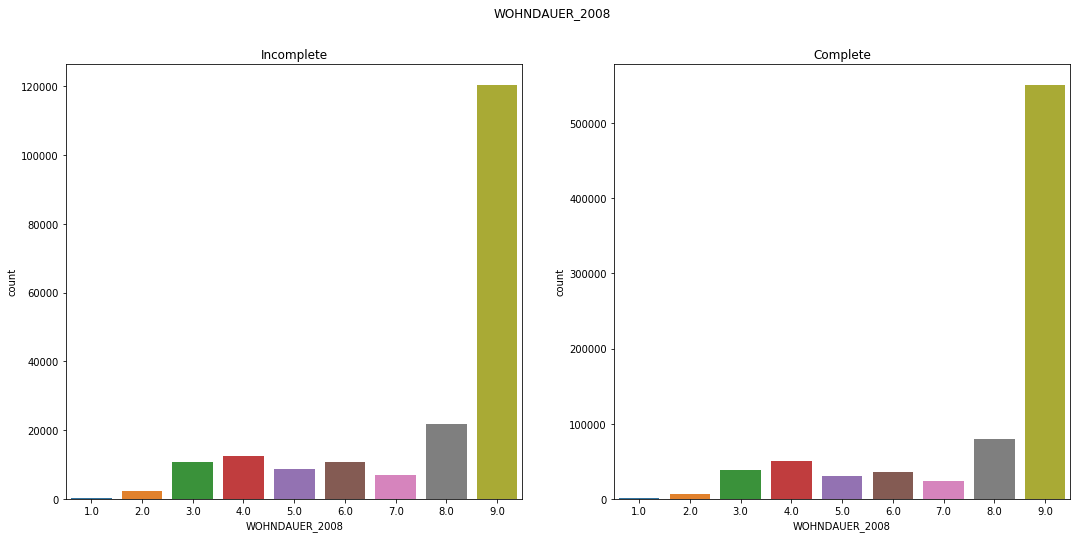

Ks_2sampResult(statistic=0.19176771606498122, pvalue=0.0)


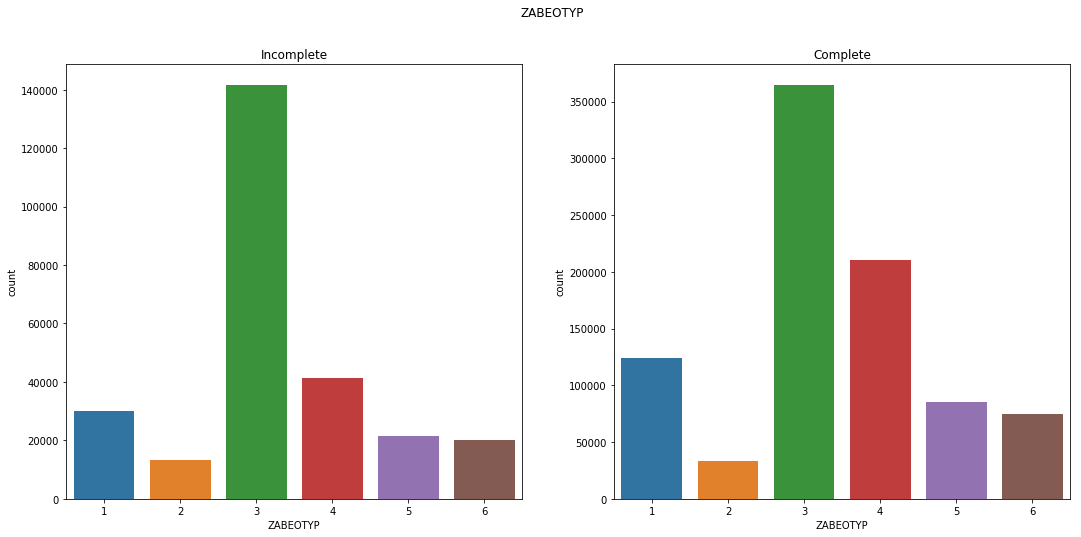

Ks_2sampResult(statistic=0.10542037089423362, pvalue=0.0)


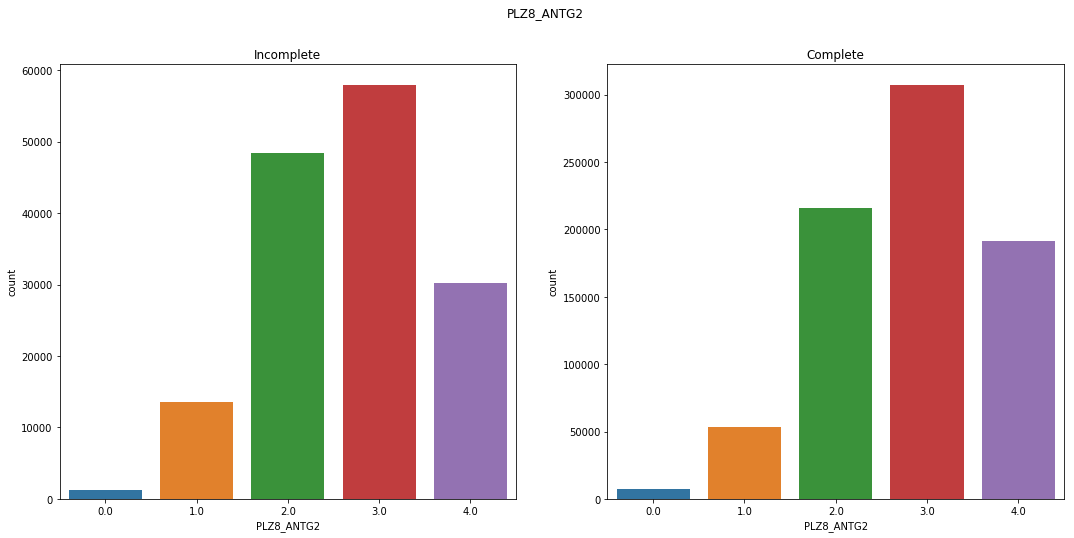

Ks_2sampResult(statistic=0.30400162501954164, pvalue=0.0)


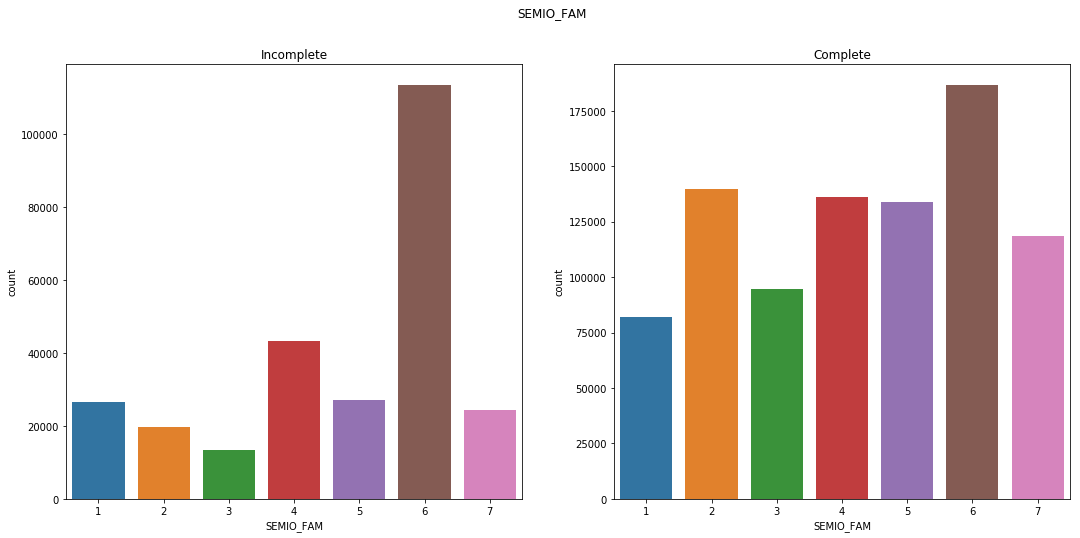

Ks_2sampResult(statistic=0.17151114769463133, pvalue=0.0)


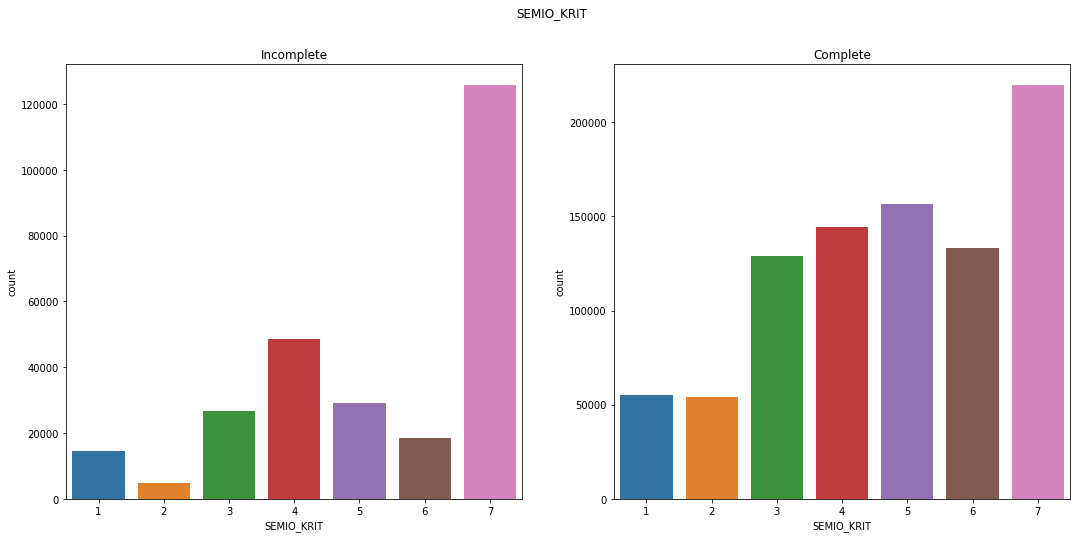

Ks_2sampResult(statistic=0.22278710761681497, pvalue=0.0)


In [64]:
for col in sample_columns:
    compare_dist_for_a_column(azdias, col, split_value)

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

In [65]:
# Remove all rows with missing values above split_value
print(azdias.shape[0])
azdias = azdias[azdias.NAN_NUM < split_value]
print(azdias.shape[0])

891221
623209


In [66]:
# Rows with missing values
high_nan_rows.shape

(268012, 76)

In [67]:
# Rows with NO missing values
low_nan_rows.shape

(623209, 76)

In [68]:
# Missing data in the dataset
azdias.isnull().sum(axis=1).sum()

0

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [69]:


# How many features are there of each data type?
feat_info.type.value_counts()

ordinal        49
categorical    15
numeric         6
mixed           5
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [70]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# Select categorical features names
categorical_features = feat_info[feat_info.type == 'categorical'].attribute
#categorical_features = feat_info.query('type == \'categorical\'').attribute
print(categorical_features)

attribute
SHOPPER_TYP              SHOPPER_TYP
VERS_TYP                    VERS_TYP
NATIONALITAET_KZ    NATIONALITAET_KZ
CAMEO_DEUG_2015      CAMEO_DEUG_2015
CAMEO_DEU_2015        CAMEO_DEU_2015
GEBAEUDETYP              GEBAEUDETYP
OST_WEST_KZ              OST_WEST_KZ
SOHO_KZ                      SOHO_KZ
LP_STATUS_FEIN        LP_STATUS_FEIN
GFK_URLAUBERTYP      GFK_URLAUBERTYP
CJT_GESAMTTYP          CJT_GESAMTTYP
ANREDE_KZ                  ANREDE_KZ
FINANZTYP                  FINANZTYP
GREEN_AVANTGARDE    GREEN_AVANTGARDE
ZABEOTYP                    ZABEOTYP
Name: attribute, dtype: object


In [71]:
# Split categorical variables into binary or multi buckets
categorical_binary = []
categorical_multi = []
for feature in categorical_features:
    if azdias[feature].nunique() > 2:
        categorical_multi.append(feature)
    else:
        categorical_binary.append(feature)

In [72]:
for col in categorical_binary:
    print(azdias[col].value_counts())

2.0    331723
1.0    291486
Name: VERS_TYP, dtype: int64
W    490879
O    132330
Name: OST_WEST_KZ, dtype: int64
0.0    617913
1.0      5296
Name: SOHO_KZ, dtype: int64
2    318591
1    304618
Name: ANREDE_KZ, dtype: int64
0    476988
1    146221
Name: GREEN_AVANTGARDE, dtype: int64


In [73]:
# Standardize binary columns into 0 or 1
azdias['VERS_TYP'].replace([2.0, 1.0], [1, 0], inplace=True)
azdias['OST_WEST_KZ'].replace(['W', 'O'], [1, 0], inplace=True)
azdias['ANREDE_KZ'].replace([2, 1], [1, 0], inplace=True)

In [74]:
for col in categorical_binary:
    print(azdias[col].value_counts())

1.0    331723
0.0    291486
Name: VERS_TYP, dtype: int64
1    490879
0    132330
Name: OST_WEST_KZ, dtype: int64
0.0    617913
1.0      5296
Name: SOHO_KZ, dtype: int64
1    318591
0    304618
Name: ANREDE_KZ, dtype: int64
0    476988
1    146221
Name: GREEN_AVANTGARDE, dtype: int64


In [75]:
# Re-encode categorical variable(s) to be kept in the analysis.

for col in categorical_multi:
    print(azdias[col].value_counts())

1.0    191885
2.0    177074
3.0    142655
0.0    111595
Name: SHOPPER_TYP, dtype: int64
1.0    543405
2.0     53856
3.0     25948
Name: NATIONALITAET_KZ, dtype: int64
8    113915
9     87295
6     87089
4     80020
3     63525
7     61735
2     59442
5     41070
1     29118
Name: CAMEO_DEUG_2015, dtype: int64
6B    46538
8A    44209
4C    37949
3C    29054
7A    28310
2D    28132
8B    27905
8C    26729
3D    26633
4A    23899
9B    23231
9D    23196
9C    20625
7B    18432
9A    16677
8D    15072
6E    13823
2C    13582
5D    12285
6C    12060
2B    10828
1D     9485
1A     8789
5B     8071
5C     7432
7C     7156
5A     7018
4D     6981
2A     6900
4B     6855
6A     5352
6D     4943
6F     4373
4E     4336
1E     4093
3B     4031
7D     4008
7E     3829
3A     3807
9E     3566
1C     3440
5F     3437
1B     3311
5E     2827
Name: CAMEO_DEU_2015, dtype: int64
1.0    357714
3.0    140520
8.0    124974
5.0         1
Name: GEBAEUDETYP, dtype: int64
1.0     175564
9.0      97350
10.0    

In [76]:
# Do one-hot-encoding and remove reference columns
azdias = pd.get_dummies(azdias, columns=categorical_multi)

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [77]:
# Select mixed features names
mixed_features = feat_info[feat_info.type == 'mixed'].attribute
print(mixed_features)

attribute
PLZ8_BAUMAX                        PLZ8_BAUMAX
PRAEGENDE_JUGENDJAHRE    PRAEGENDE_JUGENDJAHRE
CAMEO_INTL_2015                CAMEO_INTL_2015
LP_LEBENSPHASE_FEIN        LP_LEBENSPHASE_FEIN
WOHNLAGE                              WOHNLAGE
Name: attribute, dtype: object


In [78]:
azdias[mixed_features].sample(15).T

834369 347082 753346 31997  609674 527068 113093 704306  \
PLZ8_BAUMAX                1      1      1      2      1      1      2      1   
PRAEGENDE_JUGENDJAHRE      5      5     10     12      8      5     14     14   
CAMEO_INTL_2015           24     22     24     51     24     22     43     52   
LP_LEBENSPHASE_FEIN       12     12      2     27     11     16     29     24   
WOHNLAGE                   7      7      5      3      3      7      4      5   

                      611523 291832 38967  335488 865549 589037 707627  
PLZ8_BAUMAX                5      2      1      1      1      1      1  
PRAEGENDE_JUGENDJAHRE      3     14     10      7      3     14     14  
CAMEO_INTL_2015           51     25     24     44     25     24     25  
LP_LEBENSPHASE_FEIN        6      3     27     40     31      3     10  
WOHNLAGE                   3      4      3      2      5      7      7

In [79]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Generation 
generations = {0: [1, 2], # 40s
               1: [3, 4], # 50s
               2: [5, 6, 7], # 60s
               3: [8, 9], # 70s
               4: [10, 11, 12, 13], # 80s
               5:[14, 15]} # 90s

def classify_generation(value):
    try:
        for key, values in generations.items():
            if value in values:
                return key
    # In case value is NaN
    except ValueError:
        return np.nan
    
# Movement 
mainstream = [1, 3, 5, 8, 10, 12, 14]

def classify_movement(value):
    try:
        if value in mainstream:
            return 1
        else:
            return 0
    # In case value is NaN
    except ValueError:
        return np.nan

In [80]:
# Engineer generation column
azdias['PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)
#azdias.loc[:,'PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)

# Engineer movement column
azdias['PRAEGENDE_JUGENDJAHRE_MOV'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)
#azdias_new.loc[:,'PRAEGENDE_JUGENDJAHRE_MOV'] = azdias_new['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)

In [81]:
azdias.sample(15).T

590683 568785 805373 5730   222592 189263 238463  \
ALTERSKATEGORIE_GROB           4      3      1      3      4      3      1   
ANREDE_KZ                      1      1      0      1      1      1      0   
FINANZ_MINIMALIST              2      5      3      4      2      2      2   
FINANZ_SPARER                  1      2      3      1      1      3      5   
FINANZ_VORSORGER               5      4      4      5      5      3      2   
FINANZ_ANLEGER                 1      4      2      1      2      4      5   
FINANZ_UNAUFFAELLIGER          1      2      1      2      1      2      3   
FINANZ_HAUSBAUER               5      1      2      3      5      4      4   
GREEN_AVANTGARDE               0      0      0      1      0      0      0   
HEALTH_TYP                     2      3      3      2      1      3      2   
LP_LEBENSPHASE_FEIN            6     37      5     13     31      5     30   
PRAEGENDE_JUGENDJAHRE          1      8     10      2      5      8     14   
RETOURTYP_BK_S                 5      1      3      5      5      5      3   
SEMIO_SOZ                      5      2      7      1      3      5      7   
SEMIO_FAM                      3      2      7      3      3      3      7   
SEMIO_REL                      1      3      7      3      1      3      7   
SEMIO_MAT                      2      5      5      3      2      2      5   
SEMIO_VERT                     2      2      6      4      3      4      6   
SEMIO_LUST                     7      1      2      6      5      4      2   
SEMIO_ERL                      7      6      1      6      7      6      1   
SEMIO_KULT                     2      3      7      1      1      3      7   
SEMIO_RAT                      3      4      1      4      3      4      4   
SEMIO_KRIT                     5      4      2      7      6      6      2   
SEMIO_DOM                      6      6      1      7      6      7      2   
SEMIO_KAEM                     6      5      1      7      6      7      2   
SEMIO_PFLICHT                  1      5      6      3      3      5      7   
SEMIO_TRADV                    1      2      5      3      3      3      5   
SOHO_KZ                        0      0      0      0      0      0      0   
VERS_TYP                       0      0      1      1      1      0      1   
ANZ_PERSONEN                   1      8      1      1      2      1      2   
ANZ_TITEL                      0      0      0      0      0      0      0   
HH_EINKOMMEN_SCORE             6      5      6      3      6      6      4   
W_KEIT_KIND_HH                 6      2      5      6      6      3      3   
WOHNDAUER_2008                 7      9      8      9      9      9      9   
ANZ_HAUSHALTE_AKTIV          127      1     26      2      6     11      1   
ANZ_HH_TITEL                   2      0      0      0      0      0      0   
KONSUMNAEHE                    1      5      1      1      4      4      3   
MIN_GEBAEUDEJAHR            1992   1992   1992   1992   1992   1992   1992   
OST_WEST_KZ                    1      1      1      1      1      1      0   
WOHNLAGE                       3      7      3      3      5      3      3   
CAMEO_INTL_2015               55     34     41     43     45     24     41   
KBA05_ANTG1                    0      3      0      1      0      1      2   
KBA05_ANTG2                    0      1      0      3      0      2      2   
KBA05_ANTG3                    0      0      0      0      3      1      0   
KBA05_ANTG4                    2      0      1      0      0      0      0   
KBA05_GBZ                      1      5      1      3      2      3      4   
BALLRAUM                       1      7      1      1      6      6      7   
EWDICHTE                       5      1      6      6      5      4      4   
INNENSTADT                     3      8      3      1      5      4      4   
GEBAEUDETYP_RASTER             4      5      3      3      4      4      3   
KKK                            1      3      3  

In [82]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# first digit -> wealth
# second digit -> life stage

# Wealth 
def classify_wealth(value):
    # In case value is NaN
    if pd.isnull(value):
        return np.nan
    else:
        # Return first digit
        return int(str(value)[0])

# Life stage
def classify_lifestage(value):
    # In case value is NaN
    if pd.isnull(value):
        return np.nan
    else:
        # Return second digit
        return int(str(value)[1])

In [83]:
# Engineer wealth column
azdias['CAMEO_INTL_2015_WEALTH'] = azdias['CAMEO_INTL_2015'].apply(classify_wealth)

# Engineer life stage column
azdias['CAMEO_INTL_2015_LIFESTAGE'] = azdias['CAMEO_INTL_2015'].apply(classify_lifestage)

In [84]:
azdias.sample(15).T

575137 214569 140633 737085 341895 351553 502103  \
ALTERSKATEGORIE_GROB           4      4      4      1      4      3      1   
ANREDE_KZ                      0      0      0      1      1      1      1   
FINANZ_MINIMALIST              5      5      5      1      5      2      1   
FINANZ_SPARER                  1      1      3      3      1      3      5   
FINANZ_VORSORGER               5      5      3      1      5      4      3   
FINANZ_ANLEGER                 1      1      2      4      1      4      5   
FINANZ_UNAUFFAELLIGER          2      2      2      5      2      2      4   
FINANZ_HAUSBAUER               3      3      1      4      3      4      5   
GREEN_AVANTGARDE               1      1      1      1      0      0      0   
HEALTH_TYP                     2      2      2      3      2      2      3   
LP_LEBENSPHASE_FEIN            9     39      9     14     12      5     24   
PRAEGENDE_JUGENDJAHRE          6      9      9     15      1      8     14   
RETOURTYP_BK_S                 4      5      5      1      5      3      1   
SEMIO_SOZ                      6      3      6      2      2      5      1   
SEMIO_FAM                      2      4      2      2      1      2      2   
SEMIO_REL                      3      3      2      7      2      3      7   
SEMIO_MAT                      1      1      4      4      5      2      4   
SEMIO_VERT                     6      7      6      2      2      2      2   
SEMIO_LUST                     5      5      5      2      7      6      2   
SEMIO_ERL                      3      7      7      4      7      6      4   
SEMIO_KULT                     6      4      4      5      2      1      5   
SEMIO_RAT                      3      3      3      7      2      4      7   
SEMIO_KRIT                     3      3      3      7      6      7      4   
SEMIO_DOM                      3      3      3      7      6      7      7   
SEMIO_KAEM                     3      3      3      6      6      7      6   
SEMIO_PFLICHT                  2      2      3      6      1      5      6   
SEMIO_TRADV                    1      4      4      6      1      2      6   
SOHO_KZ                        0      0      0      0      0      0      0   
VERS_TYP                       0      0      1      1      0      1      1   
ANZ_PERSONEN                   1      4      1      2      1      1      4   
ANZ_TITEL                      0      0      0      0      0      0      0   
HH_EINKOMMEN_SCORE             3      1      1      5      5      6      6   
W_KEIT_KIND_HH                 6      3      4      4      6      4      2   
WOHNDAUER_2008                 9      9      9      4      9      7      9   
ANZ_HAUSHALTE_AKTIV            1      1      1      3      1     19      8   
ANZ_HH_TITEL                   0      0      0      0      0      0      0   
KONSUMNAEHE                    1      3      5      3      2      3      2   
MIN_GEBAEUDEJAHR            1992   1992   1992   1994   1992   1992   1992   
OST_WEST_KZ                    1      1      1      1      1      1      1   
WOHNLAGE                       3      3      2      2      7      4      3   
CAMEO_INTL_2015               25     24     35     24     33     44     41   
KBA05_ANTG1                    2      1      4      4      3      0      0   
KBA05_ANTG2                    1      2      1      1      1      0      2   
KBA05_ANTG3                    0      0      0      0      0      0      2   
KBA05_ANTG4                    0      0      0      0      0      2      0   
KBA05_GBZ                      5      4      3      3      4      1      3   
BALLRAUM                       4      7      6      2      6      2      1   
EWDICHTE                       3      4      5      4      4      5      6   
INNENSTADT                     5      5      7      4      5      4      1   
GEBAEUDETYP_RASTER             1      5      5      4      4      2      4   
KKK                            3      2      2  

In [85]:
# Remove unneeded and the rest of mixed columns (as per instruction above)
azdias = azdias.drop(['PRAEGENDE_JUGENDJAHRE',
                      'CAMEO_INTL_2015',
                      'PLZ8_BAUMAX',
                      'LP_LEBENSPHASE_FEIN',
                      'WOHNLAGE',
                      'REGIOTYP',
                      'KKK'], axis=1)

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [86]:
azdias.head(20).T

1       2       4       5       6       7   \
ALTERSKATEGORIE_GROB          1.0     3.0     3.0     1.0     2.0     1.0   
ANREDE_KZ                     1.0     1.0     0.0     1.0     1.0     0.0   
FINANZ_MINIMALIST             1.0     1.0     4.0     3.0     1.0     3.0   
FINANZ_SPARER                 5.0     4.0     3.0     1.0     5.0     3.0   
FINANZ_VORSORGER              2.0     1.0     4.0     5.0     1.0     4.0   
FINANZ_ANLEGER                5.0     2.0     1.0     2.0     5.0     1.0   
FINANZ_UNAUFFAELLIGER         4.0     3.0     3.0     2.0     4.0     3.0   
FINANZ_HAUSBAUER              5.0     5.0     2.0     5.0     3.0     2.0   
GREEN_AVANTGARDE              0.0     1.0     0.0     0.0     0.0     0.0   
HEALTH_TYP                    3.0     3.0     3.0     3.0     2.0     1.0   
RETOURTYP_BK_S                1.0     3.0     5.0     3.0     4.0     5.0   
SEMIO_SOZ                     5.0     4.0     6.0     2.0     2.0     7.0   
SEMIO_FAM                     4.0     1.0     4.0     4.0     5.0     7.0   
SEMIO_REL                     4.0     3.0     4.0     7.0     5.0     7.0   
SEMIO_MAT                     3.0     3.0     2.0     4.0     7.0     5.0   
SEMIO_VERT                    1.0     4.0     7.0     2.0     2.0     6.0   
SEMIO_LUST                    2.0     4.0     4.0     2.0     6.0     2.0   
SEMIO_ERL                     2.0     6.0     4.0     2.0     5.0     2.0   
SEMIO_KULT                    3.0     3.0     6.0     5.0     5.0     7.0   
SEMIO_RAT                     6.0     4.0     2.0     7.0     7.0     5.0   
SEMIO_KRIT                    4.0     7.0     3.0     4.0     7.0     1.0   
SEMIO_DOM                     7.0     7.0     2.0     4.0     4.0     1.0   
SEMIO_KAEM                    4.0     7.0     2.0     4.0     7.0     2.0   
SEMIO_PFLICHT                 7.0     3.0     4.0     7.0     7.0     5.0   
SEMIO_TRADV                   6.0     3.0     2.0     6.0     7.0     5.0   
SOHO_KZ                       1.0     0.0     0.0     0.0     0.0     0.0   
VERS_TYP                      1.0     0.0     1.0     1.0     0.0     0.0   
ANZ_PERSONEN                  2.0     1.0     4.0     1.0     1.0     1.0   
ANZ_TITEL                     0.0     0.0     0.0     0.0     0.0     0.0   
HH_EINKOMMEN_SCORE            6.0     4.0     5.0     5.0     6.0     4.0   
W_KEIT_KIND_HH                3.0     3.0     2.0     6.0     3.0     5.0   
WOHNDAUER_2008                9.0     9.0     9.0     9.0     9.0     9.0   
ANZ_HAUSHALTE_AKTIV          11.0    10.0     3.0     5.0     4.0     6.0   
ANZ_HH_TITEL                  0.0     0.0     0.0     0.0     0.0     0.0   
KONSUMNAEHE                   1.0     5.0     4.0     5.0     5.0     3.0   
MIN_GEBAEUDEJAHR           1992.0  1992.0  1992.0  1992.0  1992.0  1992.0   
OST_WEST_KZ                   1.0     1.0     1.0     1.0     1.0     1.0   
KBA05_ANTG1                   0.0     1.0     1.0     2.0     3.0     2.0   
KBA05_ANTG2                   0.0     3.0     4.0     2.0     2.0     2.0   
KBA05_ANTG3                   0.0     1.0     1.0     0.0     0.0     0.0   
KBA05_ANTG4                   2.0     0.0     0.0     0.0     0.0     0.0   
KBA05_GBZ                     1.0     3.0     3.0     4.0     3.0     4.0   
BALLRAUM                      6.0     2.0     2.0     6.0     6.0     2.0   
EWDICHTE                      3.0     4.0     5.0     2.0     4.0     5.0   
INNENSTADT                    8.0     4.0     1.0     7.0     3.0     3.0   
GEBAEUDETYP_RASTER            3.0     4.0     5.0     4.0     5.0     4.0   
MOBI_REGIO                    1.0     3.0     3.0     4.0     5.0     4.0   
ONLINE_AFFINITAET             3.0     2.0     5.0     1.0     2.0     1.0   
KBA13_ANZAHL_PKW            963.0   712.0   435.0  1300.0   867.0   758.0   
PLZ8_ANTG1                    2.0     3.0     2.0     2.0     3.0     3.0   
PLZ8_ANTG2                    3.0     3.0     4.0     3.0     3.0     3.0   
PLZ8_ANTG3                 

In [87]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Find any correlated features
columns_to_drop = correlated_columns_to_drop(azdias, 0.95)
columns_to_drop.append('GEBAEUDETYP_5.0')

In [88]:
# Remove highly correlated numerical features
azdias.drop(columns_to_drop, axis=1, inplace=True)
feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]

In [89]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# Remove NAN_NUM column
azdias = azdias.drop(['NAN_NUM'], axis=1)

# Check
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623209 entries, 1 to 891220
Columns: 164 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFESTAGE
dtypes: float64(35), int64(26), uint8(103)
memory usage: 356.0 MB


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [90]:
def clean_data(azdias, feat_info, split_value):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame, feature info DataFrame, and split_value
    OUTPUT: Trimmed and cleaned demographics DataFrame and feature info DataFrame
    """
    
    # Remove brackets and split strings into lists
    # in feat_info.missing_or_unknown
    if type(feat_info.missing_or_unknown[0]) == str:
        feat_info.missing_or_unknown = feat_info.missing_or_unknown.str.strip('[').str.strip(']').str.split(',')
    
    # Replace with NaNs all values in all columns of azdias as per mapping in feat_info
    azdias = replace_missing_values_with_nan(azdias, feat_info, 'attribute', 'missing_or_unknown', non_numerical_indicators=['X', 'XX'])

    azdias_nan = extract_columns_with_nan(azdias)

    # Drop the outlier columns
    columns_to_drop = azdias_nan[azdias_nan.percent > 30.].index.tolist()
    azdias.drop(columns_to_drop, axis=1, inplace=True)

    # Drop the corresponding columns from feat_info
    feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]

    # In order to merge to dataframes by index we need to have indexes
    # as attributes in both dataframes
    feat_info.set_index('attribute', inplace=True, drop=False)

    # Add NaN information columns to feat_info
    # by index / rows, for better columns understanding
    #feat_info = feat_info.join(azdias_nan)
    
    # Examin numerical features
    df_num = azdias.select_dtypes(include = ['float64', 'int64'])
    
    # Remove highly correlated numerical features
    columns_to_drop = correlated_columns_to_drop(df_num, 0.95)
    azdias.drop(columns_to_drop, axis=1, inplace=True)
    feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]
    
    missing_data_by_row = azdias.isnull().sum(axis=1)
    
    # Add information about number of NaN for each row to the master dataset
    azdias = azdias.assign(NAN_NUM=pd.Series(missing_data_by_row.values))
    
    high_nan_rows = azdias[azdias.NAN_NUM >= split_value].copy()
    low_nan_rows = azdias[azdias.NAN_NUM < split_value].copy()

    # Remove all rows with missing values above split_value
    azdias = azdias[azdias.NAN_NUM < split_value]
    
    # Select categorical features names
    categorical_features = feat_info[feat_info.type == 'categorical'].attribute

    # Split categorical variables into binary or multi buckets
    categorical_binary = []
    categorical_multi = []
    for feature in categorical_features:
        if azdias[feature].nunique() > 2:
            categorical_multi.append(feature)
        else:
            categorical_binary.append(feature)

    # Standardize binary columns into 0 or 1
    azdias['VERS_TYP'].replace([2.0, 1.0], [1, 0], inplace=True)
    azdias['OST_WEST_KZ'].replace(['W', 'O'], [1, 0], inplace=True)
    azdias['ANREDE_KZ'].replace([2, 1], [1, 0], inplace=True)

    # Do one-hot-encoding and remove reference columns
    azdias = pd.get_dummies(azdias, columns=categorical_multi)

    # Select mixed features names
    mixed_features = feat_info[feat_info.type == 'mixed'].attribute

    # Engineer features
    azdias['PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)
    azdias['PRAEGENDE_JUGENDJAHRE_MOV'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)
    azdias['CAMEO_INTL_2015_WEALTH'] = azdias['CAMEO_INTL_2015'].apply(classify_wealth)
    azdias['CAMEO_INTL_2015_LIFESTAGE'] = azdias['CAMEO_INTL_2015'].apply(classify_lifestage)
    
    # Remove unneeded and the rest of mixed columns (as per instruction above)
    azdias = azdias.drop(['PRAEGENDE_JUGENDJAHRE',
                          'CAMEO_INTL_2015',
                          'PLZ8_BAUMAX',
                          'LP_LEBENSPHASE_FEIN',
                          'WOHNLAGE'], axis=1)
    
    if 'REGIOTYP' in azdias.columns:
        azdias = azdias.drop(['REGIOTYP'], axis=1)
        
    if 'KKK' in azdias.columns:
        azdias = azdias.drop(['KKK'], axis=1)
        
    if 'KBA05_BAUMAX' in azdias.columns:
        azdias = azdias.drop(['KBA05_BAUMAX'], axis=1)
        
    if 'TITEL_KZ' in azdias.columns:
        azdias = azdias.drop(['TITEL_KZ'], axis=1)
        
    if 'AGER_TYP' in azdias.columns:
        azdias = azdias.drop(['AGER_TYP'], axis=1)
        
    if 'GEBURTSJAHR' in azdias.columns:
        azdias = azdias.drop(['GEBURTSJAHR'], axis=1)
        
    if 'ALTER_HH' in azdias.columns:
        azdias = azdias.drop(['ALTER_HH'], axis=1)
        
    if 'GEBAEUDETYP_5.0' in azdias.columns:
        azdias = azdias.drop(['GEBAEUDETYP_5.0'], axis=1)

    # Remove highly correlated numerical features
    columns_to_drop = correlated_columns_to_drop(azdias, 0.95)
    azdias.drop(columns_to_drop, axis=1, inplace=True)
    feat_info = feat_info[~feat_info.attribute.isin(columns_to_drop)]

    # Remove NAN_NUM column
    azdias = azdias.drop(['NAN_NUM'], axis=1)
    
    return azdias, feat_info, high_nan_rows, low_nan_rows


In [91]:
# Before test
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623209 entries, 1 to 891220
Columns: 164 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFESTAGE
dtypes: float64(35), int64(26), uint8(103)
memory usage: 356.0 MB


In [92]:
# TEST

# Load in the general demographics data.
azdias_clean = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info_clean = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

split_value = 1

azdias_clean, feat_info_clean, high_nan_rows_clean, low_nan_rows_clean = clean_data(azdias_clean, feat_info_clean, split_value)

In [93]:
# After test
azdias_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623209 entries, 1 to 891220
Columns: 164 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFESTAGE
dtypes: float64(35), int64(26), uint8(103)
memory usage: 356.0 MB


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [94]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# Number of rows with missing data comparing to number of all rows
count_all_rows = azdias_clean.shape[0]
azdias_clean_nans = azdias_clean[azdias_clean.isnull().any(axis=1)]
count_rows_with_nans = azdias_clean_nans.shape[0]
percent_nans = count_rows_with_nans * 100 / count_all_rows
print('All rows {}, complete rows {}, incomplete rows {} ({:0.2f}%)'.format(count_all_rows,
                                                                      count_all_rows - count_rows_with_nans,
                                                                      count_rows_with_nans,
                                                                      percent_nans))


All rows 623209, complete rows 623209, incomplete rows 0 (0.00%)


In [95]:
# Apply feature scaling to the general population demographics data.

scaler = StandardScaler()
azdias_clean_std = scaler.fit_transform(azdias_clean)

In [96]:
azdias_clean_std

array([[-1.7462911 ,  0.97782476, -1.51222382, ...,  1.16445424,
         1.14788172, -1.25110753],
       [ 0.20210748,  0.97782476, -1.51222382, ...,  1.16445424,
        -0.90999737,  0.74982182],
       [ 0.20210748, -1.02267813,  0.69240603, ..., -0.21339954,
         0.46192202,  0.08284537],
       ..., 
       [-0.77209181,  0.97782476, -1.51222382, ...,  0.47552735,
        -0.22403767, -1.25110753],
       [-1.7462911 , -1.02267813, -1.51222382, ...,  1.16445424,
         1.14788172, -1.25110753],
       [ 1.17630677, -1.02267813,  0.69240603, ..., -1.59125332,
         0.46192202,  0.08284537]])

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [97]:
# Apply PCA to the data.

pca = PCA()
azdias_pca = pca.fit_transform(azdias_clean_std)

#pca.explained_variance_ratio_

In [98]:
# Investigate the variance accounted for by each principal component.

# From Udacity's course with minor modifications
def scree_plot(pca, components_no=None, show_labels=False):

    vals = pca.explained_variance_ratio_
    if components_no:
        vals = vals[:components_no]
    num_components = len(vals)
    ind = np.arange(num_components)
 
    plt.figure(figsize=(18, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    
    if show_labels:
        for i in range(num_components):
            ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

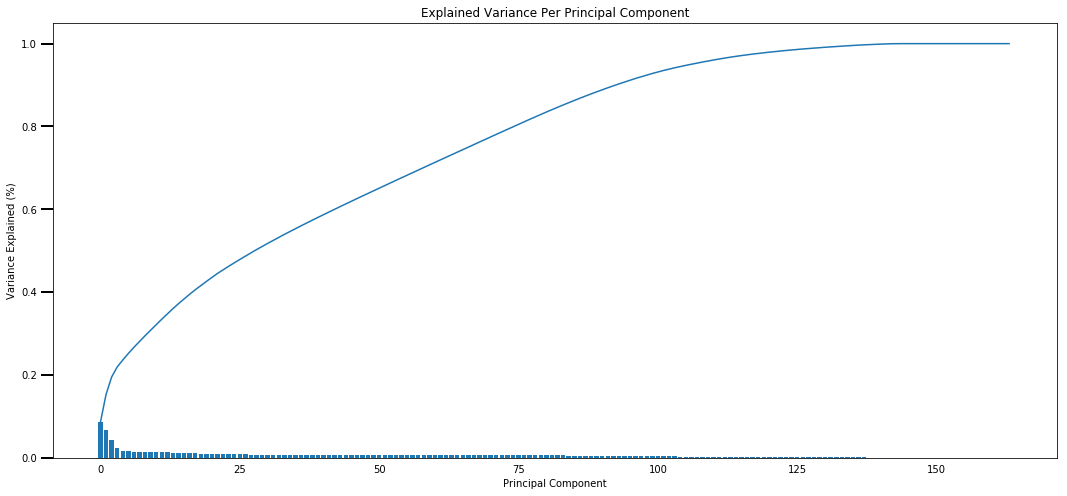

In [99]:
scree_plot(pca, show_labels=False)

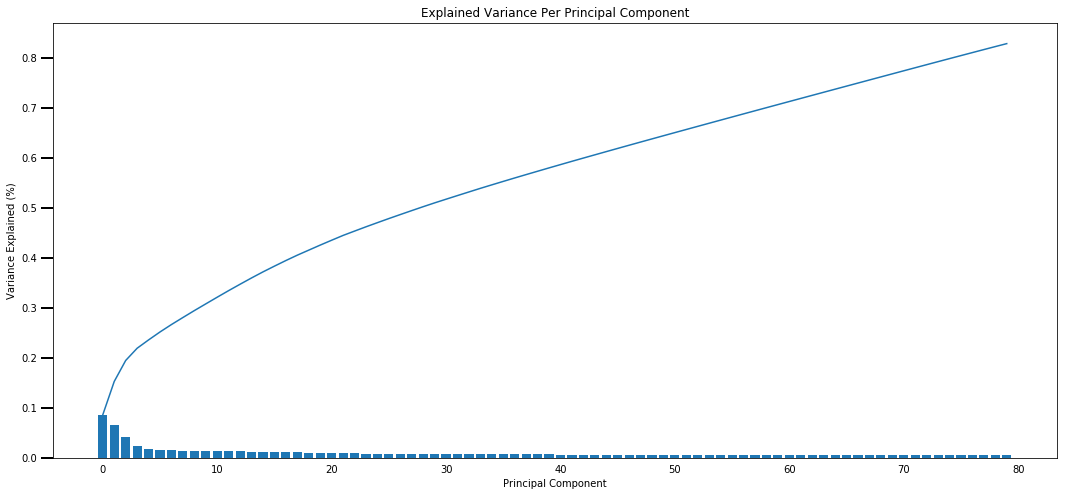

In [100]:
# It seems, that we need around 80 principal components to explain around 80% of variability
# Let's take a closer look
scree_plot(pca, components_no=80, show_labels=False)

In [101]:
# Let's get some more details
pca.explained_variance_ratio_[:5].sum()

0.23599290801318956

In [102]:
# Let's see in numbers how variability coverage grows
# when adding more and more components
for i in np.arange(10, 81, 10):
    print('{} components explain {} of variance.'.format(i, pca.explained_variance_ratio_[:i].sum()))

10 components explain 0.30813510417623047 of variance.
20 components explain 0.42579838072722304 of variance.
30 components explain 0.5103274956581295 of variance.
40 components explain 0.5803575621240693 of variance.
50 components explain 0.644737988685317 of variance.
60 components explain 0.7070899556796217 of variance.
70 components explain 0.7686238321504761 of variance.
80 components explain 0.8291189880596584 of variance.


In [103]:
# It seems that 80 is a good candidate (explaining almost 83% of variability) 
# for number of components for PCA

# Number of original features
azdias_clean_std.shape[1]

164

In [104]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=80)
azdias_pca = pca.fit_transform(azdias_clean_std)

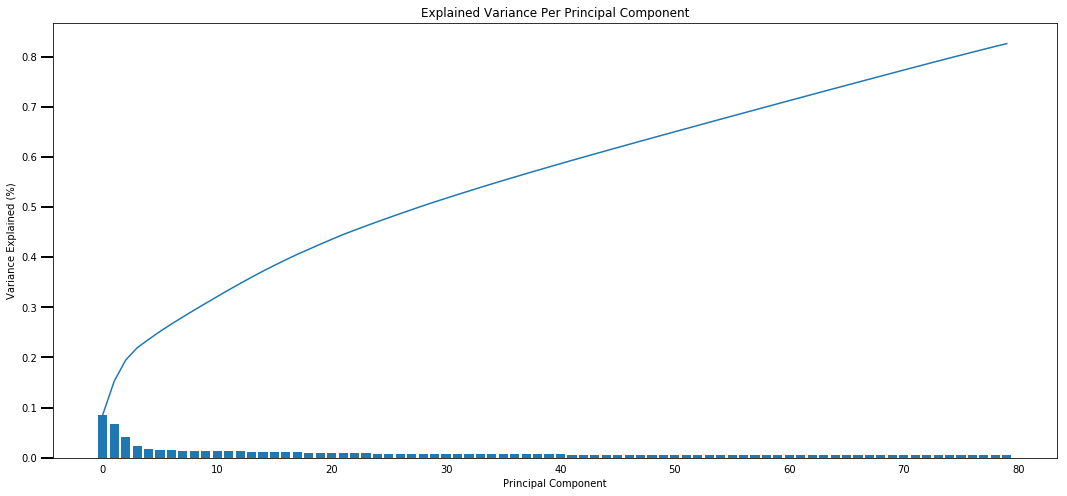

In [105]:
scree_plot(pca, show_labels=False)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [106]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# Plot features_no features with the most positive and negative variance
# for a component_no PCA component
def pca_results(df, pca, component_no, features_no, show_plot=True):
    
    # Build a dataframe with features_no features capturing most variability
    # for a given component number (component_no)
    pca_comp = pd.DataFrame(np.round(pca.components_, 4), columns=df.keys()).iloc[component_no - 1]
    pca_comp.sort_values(ascending=False, inplace=True)
    pca_comp = pd.concat([pca_comp.head(features_no), pca_comp.tail(features_no)])
    
    if show_plot:
        # Plot the result
        pca_comp.plot(kind='bar', 
                  title='Most {} weighted features for PCA component {}'.format(features_no*2, component_no),
                  figsize=(12, 6))
        plt.show()
    
    return pca_comp

In [107]:
# Most 10 weighted features for PCA Component 1
#pca_results(azdias_clean, pca, 1, 5)

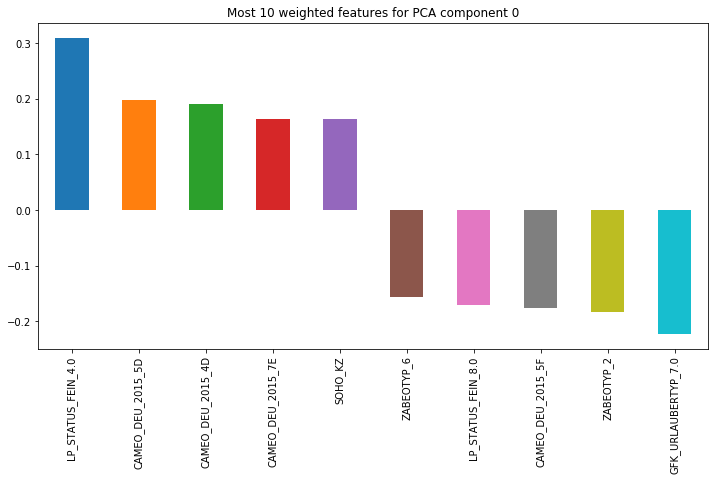

LP_STATUS_FEIN_4.0     0.3100
CAMEO_DEU_2015_5D      0.1976
CAMEO_DEU_2015_4D      0.1903
CAMEO_DEU_2015_7E      0.1636
SOHO_KZ                0.1635
ZABEOTYP_6            -0.1560
LP_STATUS_FEIN_8.0    -0.1707
CAMEO_DEU_2015_5F     -0.1768
ZABEOTYP_2            -0.1823
GFK_URLAUBERTYP_7.0   -0.2229
Name: 79, dtype: float64


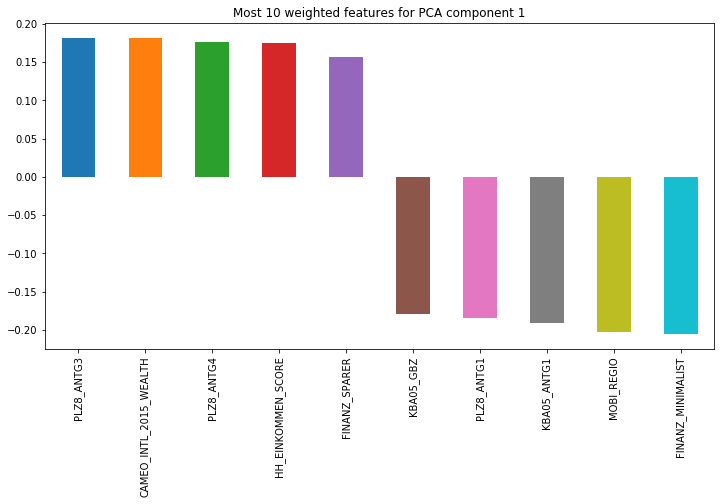

PLZ8_ANTG3                0.1816
CAMEO_INTL_2015_WEALTH    0.1809
PLZ8_ANTG4                0.1761
HH_EINKOMMEN_SCORE        0.1747
FINANZ_SPARER             0.1569
KBA05_GBZ                -0.1791
PLZ8_ANTG1               -0.1837
KBA05_ANTG1              -0.1906
MOBI_REGIO               -0.2030
FINANZ_MINIMALIST        -0.2056
Name: 0, dtype: float64


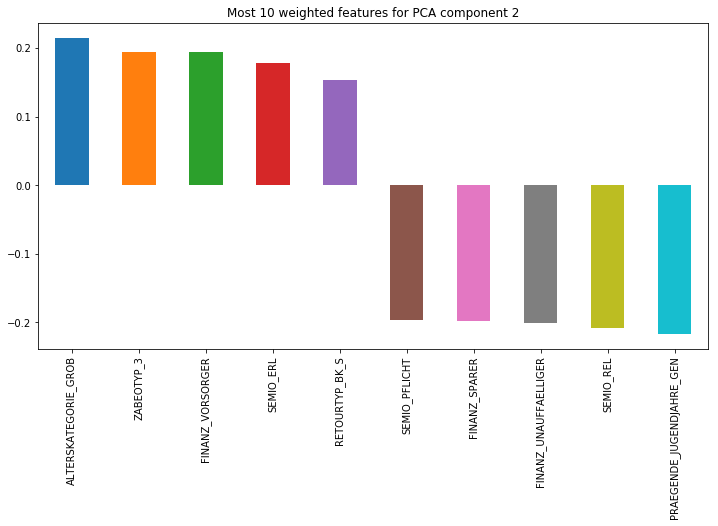

ALTERSKATEGORIE_GROB         0.2152
ZABEOTYP_3                   0.1945
FINANZ_VORSORGER             0.1940
SEMIO_ERL                    0.1779
RETOURTYP_BK_S               0.1541
SEMIO_PFLICHT               -0.1965
FINANZ_SPARER               -0.1978
FINANZ_UNAUFFAELLIGER       -0.2005
SEMIO_REL                   -0.2081
PRAEGENDE_JUGENDJAHRE_GEN   -0.2170
Name: 1, dtype: float64


In [108]:
# Check first 3 components
for i in np.arange(0, 3, 1):
    res = pca_results(azdias_clean, pca, i, 5)
    print(res)

### Discussion 2.3: Interpret Principal Components

#### Dimension 1
The first principal component is positively associated with (top-down):

- LP_STATUS_FEIN_4.0 (Social status: Villagers)
- CAMEO_DEU_2015_5D (Wealth: Stock Market Junkies)
- CAMEO_DEU_2015_4D (Life stage typology: Empty Nest)
- CAMEO_DEU_2015_7E (Life stage typology: Urban Parents)
- SOHO_KZ (Small office / home office)

and negatively associated with (bottom-up):

- ZABEOTYP_6 (Energy consumption typology: Indifferent)
- LP_STATUS_FEIN_8.0 (Social status: New houseowners)
- CAMEO_DEU_2015_5F (Life stage typology: Active Retirement)
- ZABEOTYP_2 (Energy consumption typology: Smart)
- GFK_URLAUBERTYP_7.0 (Vacation habits: Golden ager)

It appears that the first component is mostly influenced by social, financial and later stage of life.

#### Dimension 2
The second principal component is positively associated with (top-down):

- PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region)
- CAMEO_INTL_2015_WEALTH (Wealth)
- PLZ8_ANTG4 (Number of 10+ family houses in the PLZ8 region)
- HH_EINKOMMEN_SCORE (Estimated household net income)
- FINANZ_SPARER (Financial typology / hoarding level)

and negatively associated with (bottom-up):

- KBA05_GBZ (Number of buildings in the microcell)
- PLZ8_ANTG1 (Number of 1-2 family houses in the PLZ8 region)
- KBA05_ANTG1 (Number of 1-2 family houses in the microcell)
- MOBI_REGIO (Movement patterns)
- FINANZ_MINIMALIST (Financial typology: Low financial interest)

It appears that the second component is influenced by houshold, surroundings, moving patterns and income / wealth level.

#### Dimension 3

- ALTERSKATEGORIE_GROB (Estimated age based on given name analysis)
- ZABEOTYP_3 (Fair supplied energy consumption)
- FINANZ_VORSORGER (Financial typology / prevention level)
- SEMIO_ERL (Event-oriented personality type)
- RETOURTYP_BK_S (product return type of personality)

and negatively associated with (bottom-up):

- SEMIO_PFLICHT (dutiful personality type)
- FINANZ_SPARER (Financial typology / hoarding level)
- FINANZ_UNAUFFAELLIGER (Financial typology / noticeability level)
- SEMIO_REL (Religious personality type)
- PRAEGENDE_JUGENDJAHRE_GEN (generation to which a person belongs)

It appears that the third component is influenced by age, money related habits (product returns, events, savings level), openess and religiousness.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [109]:
# Create a toy dataset to reduce computation time
# Reduce the size to 25%
azdias_pca_sample = azdias_pca[np.random.choice(azdias_pca.shape[0], int(azdias_pca.shape[0]*0.25), replace=False)]
azdias_pca_sample 

array([[ 3.09605153,  7.01232093, -2.31562741, ...,  1.31057117,
         0.49857076, -1.44918778],
       [-1.24985594, -0.58132904,  1.68236548, ...,  0.46923182,
         0.63037187, -1.42618407],
       [-4.87104729,  2.94923932, -1.68806098, ..., -1.20299843,
        -0.44108914, -0.21201222],
       ..., 
       [-2.71572806, -2.65220581,  0.93247049, ...,  1.91002359,
        -0.48994004,  0.1041024 ],
       [ 1.39156537,  4.52300413,  4.68035743, ..., -0.97548412,
         0.72580182, -0.44304733],
       [ 0.65657383, -3.49560207, -2.98781252, ..., -1.13373323,
         0.86364748,  0.14972983]])

In [110]:
# Over a number of different cluster counts...
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.

sse = [] # Sum of Squared Errors
k_range = np.arange(10, 31)

for k in k_range:
    kmeans = KMeans(k, random_state=1234, max_iter=30, n_jobs=-1).fit(azdias_pca_sample)
    score = np.abs(kmeans.score(azdias_pca_sample))
    sse.append(score)
    print('Clustering done for {} k, with SSE {}'.format(k, score))

Clustering done for 10 k, with SSE 16509600.22264987
Clustering done for 11 k, with SSE 16401287.436694236
Clustering done for 12 k, with SSE 16234715.528633505
Clustering done for 13 k, with SSE 16072637.385553649
Clustering done for 14 k, with SSE 15987771.904409451
Clustering done for 15 k, with SSE 15843110.941428168
Clustering done for 16 k, with SSE 15782814.369965075
Clustering done for 17 k, with SSE 15698747.947994074
Clustering done for 18 k, with SSE 15562428.233074127
Clustering done for 19 k, with SSE 15409168.456675865
Clustering done for 20 k, with SSE 15239224.612620912
Clustering done for 21 k, with SSE 15103541.714078844
Clustering done for 22 k, with SSE 15016888.000479538
Clustering done for 23 k, with SSE 14878378.049390838
Clustering done for 24 k, with SSE 14701707.900435705
Clustering done for 25 k, with SSE 14620355.164383847
Clustering done for 26 k, with SSE 14493515.051027583
Clustering done for 27 k, with SSE 14371403.892341502
Clustering done for 28 k, wit

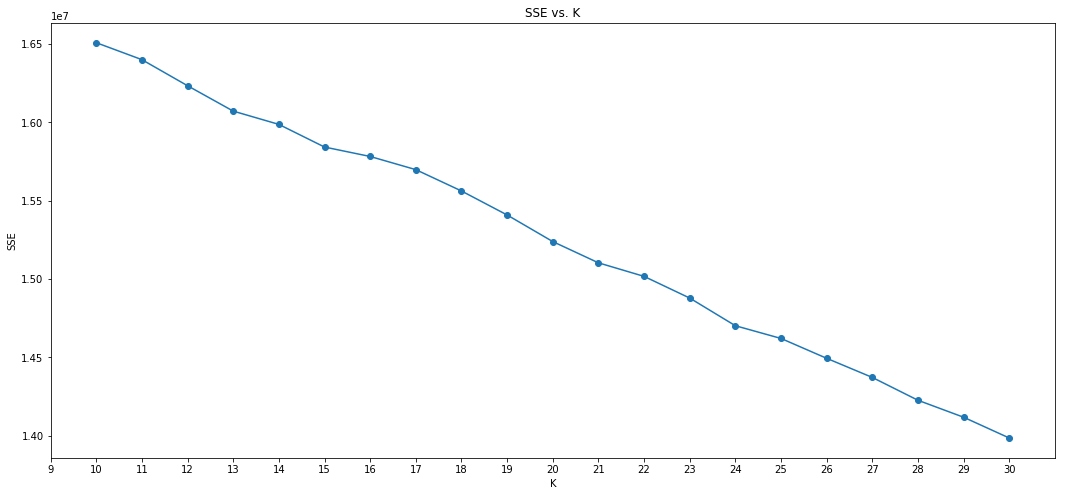

In [111]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

# Use the Elbow Method to identify the right value of k
plt.figure(figsize=(18, 8))
plt.xticks(np.arange(0, k_range[-1]+1, step=1))
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')
plt.plot(k_range, sse, linestyle='-', marker='o');

In [112]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
k = 24
kmeans = KMeans(k, random_state=1234, max_iter=30, n_jobs=-1).fit(azdias_pca)
population_clusters = kmeans.predict(azdias_pca)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [113]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [114]:
customers.head(10)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0         2                     4          1            5.0   
1        -1                     4          1            NaN   
2        -1                     4          2            2.0   
3         1                     4          1            2.0   
4        -1                     3          1            6.0   
5         1                     3          1            4.0   
6         2                     4          1            2.0   
7         1                     4          1            2.0   
8         2                     4          2            1.0   
9         1                     3          1            3.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  5              1                 5               1   
1                  5              1                 5               1   
2                  5              1                 5               1   
3                  5              1                 5               2   
4                  3              1                 4               4   
5                  5              1                 5               1   
6                  5              1                 5               1   
7                  5              1                 5               1   
8                  2              2                 5               1   
9                  5              2                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      2                 2          2            0   
1                      3                 2          2            0   
2                      4                 4          2            0   
3                      1                 2          6            0   
4                      5                 2          2         1960   
5                      2                 3          5            0   
6                      1                 2          2         1942   
7                      2                 2          5         1938   
8                      1                 5          5         1914   
9                      3                 1          2         1959   

   GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  \
0              4.0                 1           1                 20.0   
1              NaN                 0           1                  NaN   
2              3.0                 1           2                 13.0   
3             10.0                 0           2                  0.0   
4              2.0                 0           3                 31.0   
5             11.0                 1           3                 17.0   
6             10.0                 1           2                 20.0   
7              8.0                 1           1                 20.0   
8              3.0                 0           2                  6.0   
9              1.0                 1           3                 28.0   

   LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  \
0                  5.0              2.0              2.0            10.0   
1                  NaN              NaN              NaN             NaN   
2                  3.0              1.0              1.0            10.0   
3                  0.0              0.0              0.0             9.0   
4                 10.0             10.0              5.0             1.0   
5                  5.0              2.0              2.0             7.0   
6                  5.0              2.0              2.0            10.0   
7                  5.0              2.0              2.0            10.0   
8                  2.0              1.0              1.0             1.0   
9                  8.0              8.0              4.0            10.0   

   LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  \
0             5

In [115]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

### Step 1: Preprocessing
customers_clean, feat_info_clean, cust_high_nan_rows_clean, cust_low_nan_rows_clean = clean_data(customers, feat_info, split_value)

In [116]:
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121111 entries, 0 to 191651
Columns: 164 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFESTAGE
dtypes: float64(35), int64(26), uint8(103)
memory usage: 69.2 MB


In [117]:
### Step 2: Feature Transformation
# Remove rows with NaNs
customers_clean = customers_clean.dropna()

In [118]:
# Apply feature scaling to the customers demographics data
customers_clean_std = scaler.transform(customers_clean)

In [119]:
# Apply PCA to the data
customers_pca = pca.transform(customers_clean_std)

In [120]:
### Step 3: Clustering
# Cluster predictions for the general population demographics data.
kmeans = KMeans(k, random_state=1234, max_iter=30, n_jobs=-1).fit(customers_pca)
customer_clusters = kmeans.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [121]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
population_clusters = pd.Series(population_clusters)
popc = population_clusters.value_counts().sort_index()
popc = pd.Series(popc)
#popc

customer_clusters = pd.Series(customer_clusters)
custc = customer_clusters.value_counts().sort_index()
custc = pd.Series(custc)
#custc

# Missing rows from population dataset
popm = high_nan_rows.shape[0]
#popm

# Missing rows from customer dataset
custm = cust_high_nan_rows_clean.shape[0]
#custm

In [122]:
# Create a dataset summarizing clustering information
pop_cust = pd.concat([popc, custc], axis=1).reset_index()
pop_cust.columns = ['cluster', 'population', 'customers']

# Add missing rows cluster
pop_cust.loc[-1] = ['-1', popm, custm]
# Recalculate index
pop_cust.index = pop_cust.index + 1
# Sort by cluster (index)
pop_cust.sort_index(inplace=True)

# Calculate proprotions
pop_cust['cust_prop'] = pop_cust['customers'] / pop_cust['customers'].sum()
pop_cust['pop_prop'] = pop_cust['population'] / pop_cust['population'].sum()
pop_cust

cluster  population  customers  cust_prop  pop_prop
0       -1      268012      70541   0.368068  0.300725
1        0       39342       2572   0.013420  0.044144
2        1       33570       7308   0.038132  0.037667
3        2       27555       8348   0.043558  0.030918
4        3       18367       2304   0.012022  0.020609
5        4       31814       3614   0.018857  0.035697
6        5       20785       3713   0.019374  0.023322
7        6       19070       5240   0.027341  0.021398
8        7       55643       3419   0.017840  0.062435
9        8       38196       7379   0.038502  0.042858
10       9       44302       4287   0.022369  0.049709
11      10       13395       5185   0.027054  0.015030
12      11       12147       9202   0.048014  0.013630
13      12       35082       2710   0.014140  0.039364
14      13       13476       5308   0.027696  0.015121
15      14       45136       4451   0.023224  0.050645
16      15       28526       7569   0.039493  0.032008
17      16       10797       3050   0.015914  0.012115
18      17       35845       8598   0.044863  0.040220
19      18       31180       3383   0.017652  0.034986
20      19        3437       2658   0.013869  0.003857
21      20       28563       6469   0.033754  0.032049
22      21       21466       3086   0.016102  0.024086
23      22        3440       7578   0.039540  0.003860
24      23       12075       3680   0.019201  0.013549

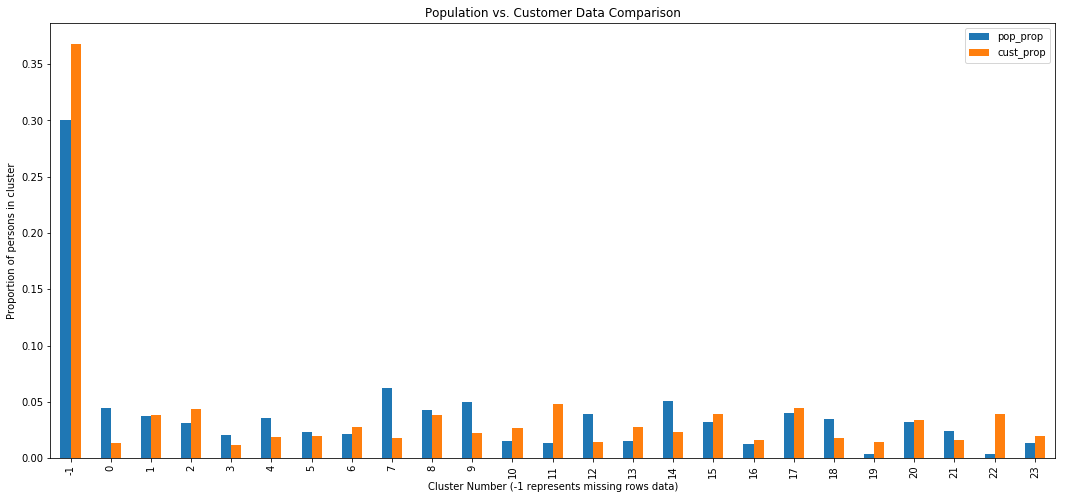

In [123]:
# Compare visually
pop_cust.plot(x='cluster', y=['pop_prop', 'cust_prop'], kind='bar', figsize=(18, 8))
plt.title('Population vs. Customer Data Comparison')
plt.xlabel('Cluster Number (-1 represents missing rows data)')
plt.ylabel('Proportion of persons in cluster')
plt.show()

In [124]:
# Let's examine people of cluster 23
# 5 top principal components of cluster 23
cc23 = kmeans.cluster_centers_[23]
cc23 = pd.Series(cc23)
cc23.sort_values(ascending=False, inplace=True)
cc23.head(5)

74    6.690226
62    4.553740
59    3.631436
60    3.499450
38    2.199405
dtype: float64

In [125]:
# Transform cluster 23 to original feature values
cc23 = scaler.inverse_transform(pca.inverse_transform(cc23))
cc23 = pd.Series(cc23).round()
cc23.index = customers_clean.columns
cc23

ALTERSKATEGORIE_GROB            3.0
ANREDE_KZ                      -0.0
FINANZ_MINIMALIST               3.0
FINANZ_SPARER                   2.0
FINANZ_VORSORGER                4.0
FINANZ_ANLEGER                  2.0
FINANZ_UNAUFFAELLIGER           2.0
FINANZ_HAUSBAUER                5.0
GREEN_AVANTGARDE                1.0
HEALTH_TYP                      3.0
RETOURTYP_BK_S                  4.0
SEMIO_SOZ                       7.0
SEMIO_FAM                       7.0
SEMIO_REL                       4.0
SEMIO_MAT                       5.0
SEMIO_VERT                      7.0
SEMIO_LUST                      6.0
SEMIO_ERL                       3.0
SEMIO_KULT                      6.0
SEMIO_RAT                       3.0
SEMIO_KRIT                      4.0
SEMIO_DOM                       4.0
SEMIO_KAEM                      2.0
SEMIO_PFLICHT                   4.0
SEMIO_TRADV                     3.0
SOHO_KZ                        -0.0
VERS_TYP                        1.0
ANZ_PERSONEN                

In [126]:
# Analyze 2 top principal components of cluster 23
pca_results(customers_clean, pca, 74, 5, False)

CAMEO_DEU_2015_1B      0.2472
GFK_URLAUBERTYP_4.0    0.2070
GEBAEUDETYP_8.0        0.1969
GFK_URLAUBERTYP_5.0    0.1925
KBA05_ANTG3            0.1651
LP_STATUS_FEIN_2.0    -0.1476
CJT_GESAMTTYP_4.0     -0.2457
GFK_URLAUBERTYP_1.0   -0.2770
FINANZTYP_1           -0.3192
LP_STATUS_FEIN_7.0    -0.3672
Name: 73, dtype: float64

In [127]:
pca_results(customers_clean, pca, 62, 5, False)

CJT_GESAMTTYP_4.0       0.5225
CAMEO_DEU_2015_9E       0.2562
FINANZTYP_2             0.2383
GFK_URLAUBERTYP_4.0     0.1877
LP_STATUS_FEIN_2.0      0.1658
CJT_GESAMTTYP_1.0      -0.1669
GFK_URLAUBERTYP_1.0    -0.1747
GEBAEUDETYP_3.0        -0.2662
GFK_URLAUBERTYP_10.0   -0.2972
FINANZTYP_3            -0.3354
Name: 61, dtype: float64

In [128]:
# 5 top principal components of cluster 1
cc1 = kmeans.cluster_centers_[1]
cc1 = pd.Series(cc1)
cc1.sort_values(ascending=False, inplace=True)
cc1.head(5)

62    7.450012
63    6.962994
60    3.460513
69    3.257516
58    2.913303
dtype: float64

In [129]:
# Transform cluster 1 to original feature values
cc1 = scaler.inverse_transform(pca.inverse_transform(cc1))
cc1 = pd.Series(cc1).round()
cc1.index = customers_clean.columns
cc1

ALTERSKATEGORIE_GROB            3.0
ANREDE_KZ                      -0.0
FINANZ_MINIMALIST               3.0
FINANZ_SPARER                   2.0
FINANZ_VORSORGER                5.0
FINANZ_ANLEGER                  1.0
FINANZ_UNAUFFAELLIGER           1.0
FINANZ_HAUSBAUER                5.0
GREEN_AVANTGARDE                0.0
HEALTH_TYP                      4.0
RETOURTYP_BK_S                  4.0
SEMIO_SOZ                       7.0
SEMIO_FAM                       6.0
SEMIO_REL                       3.0
SEMIO_MAT                       5.0
SEMIO_VERT                      7.0
SEMIO_LUST                      6.0
SEMIO_ERL                       4.0
SEMIO_KULT                      6.0
SEMIO_RAT                       2.0
SEMIO_KRIT                      4.0
SEMIO_DOM                       4.0
SEMIO_KAEM                      3.0
SEMIO_PFLICHT                   3.0
SEMIO_TRADV                     2.0
SOHO_KZ                        -0.0
VERS_TYP                        1.0
ANZ_PERSONEN                

In [130]:
# Analyze 2 top principal components of cluster 1
pca_results(customers_clean, pca, 74, 5, False)

CAMEO_DEU_2015_1B      0.2472
GFK_URLAUBERTYP_4.0    0.2070
GEBAEUDETYP_8.0        0.1969
GFK_URLAUBERTYP_5.0    0.1925
KBA05_ANTG3            0.1651
LP_STATUS_FEIN_2.0    -0.1476
CJT_GESAMTTYP_4.0     -0.2457
GFK_URLAUBERTYP_1.0   -0.2770
FINANZTYP_1           -0.3192
LP_STATUS_FEIN_7.0    -0.3672
Name: 73, dtype: float64

In [131]:
pca_results(customers_clean, pca, 57, 5, False)

GFK_URLAUBERTYP_4.0     0.2887
GFK_URLAUBERTYP_7.0     0.2397
ZABEOTYP_1              0.2268
LP_STATUS_FEIN_3.0      0.2128
CAMEO_DEU_2015_1C       0.2105
GFK_URLAUBERTYP_11.0   -0.1658
CJT_GESAMTTYP_3.0      -0.1889
CAMEO_DEUG_2015_9      -0.1966
GFK_URLAUBERTYP_6.0    -0.2730
FINANZTYP_6            -0.2781
Name: 56, dtype: float64

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.